# **Initial EDA**

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from sklearn.ensemble import RandomForestRegressor
from torchvision import transforms
from scipy import stats

## **Load the CSV datasets**

In [2]:
metadata_ds = pd.read_csv("../dataset/train_val.csv")
test_metadata_ds = pd.read_csv("../dataset/test.csv")

In [3]:
metadata_ds

,Unnamed: 0,id,channel,title,date,description,views,year
0,0,--2s6hjGrm4,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI & VFX Breakdowns: ""Warzone"" - by Ramesh Th...",2020-12-15 05:00:01+00:00,"Check out this revealing VFX Breakdown ""Warzon...",12299,2020
1,1,--DnfroyKQ8,UC-1rx8j9Ggp8mp4uD0ZdEIA,"A Sci-Fi Short Film: ""Exit"" - by Ng King Kwan ...",2020-07-01 16:00:00+00:00,"TheCGBros Presents ""Exit"" by Ng King Kwan - Th...",7494,2020
2,2,--aiU7VQKEw,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI 3D Animated Short: ""Lost Love"" - by Akash ...",2019-02-18 20:30:00+00:00,"TheCGBros Presents ""Lost Love"" by Akash Manack...",11831,2019
3,6,-0SrlZAvSVM,UCW6NyJ6oFLPTnx7iGRZXDDg,Jo Goes Hunting - Careful | Animated music vid...,2020-03-10 14:30:01+00:00,"On the borderless map of a magical planet, lit...",2248,2020
4,10,-13Y2Pe7kFs,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI VFX Breakdown: ""Logan (Wolverine): Digital...",2017-09-20 20:13:52+00:00,Check out this outstanding behind-the-scenes l...,113806,2017
...,...,...,...,...,...,...,...,...
15477,22494,luPsBdTuRnY,UC2zrmdd_rWlMc2rAufX9bSg,TOONOCALYPSE | Omeleto Sci-Fi,2021-01-14 12:28:23+00:00,Cartoon aliens arrive on Earth.\n\n\nTOONOCALY...,8848,2021
15478,22495,m4GFVJsP9jA,UCNvn1EEO-ZgN2IHkCLnA1Ng,HUHU ATTACK | Omeleto Horror,2023-11-13 06:34:56+00:00,Two strangers fall in love.\n\n\nHUHU ATTACK i...,2940,2023
15479,22496,mAO1ZbLDr74,UCKMV8axq3zTUmiyXav2Ytew,THREE SACKS FULL OF HATS | Omeleto Drama,2020-12-23 12:16:06+00:00,A man faces his family.\n\n\nTHREE SACKS FULL ...,10595,2020
15480,22497,mOBI8dVoHXU,UCKMV8axq3zTUmiyXav2Ytew,SC 4 | Omeleto Drama,2022-01-05 10:42:38+00:00,A woman wakes up in an overturned car.\n\n\nSC...,4689,2022


In [4]:
test_metadata_ds

,Unnamed: 0,channel,title,date,description,year,id
0,0,UCiCnPY--pbn5S8JkJdV2PbQ,নিজের অতীত ভুলে গেলে #bengalimovies #banglacin...,2024-12-19 03:30:00+00:00,Enjoy and stay connected with us!!\n\nSubscrib...,2024,0
1,1,UC71x8bBOwIEscxAltguHXMQ,2024: A YEAR IN FILMS,2024-11-25 17:47:19+00:00,"Here we are, at the end of another cinematic y...",2024,1
2,2,UCW6NyJ6oFLPTnx7iGRZXDDg,Short film on Argentina's military dictatorshi...,2024-09-21 13:30:00+00:00,"Argentina, on 1983. A woman dedicates her whol...",2024,2
3,3,UCiCnPY--pbn5S8JkJdV2PbQ,Rupantar | রূপান্তর - Full Movie | Sabyasachi ...,2024-10-18 12:30:00+00:00,"Watch the Bengali Full Movie ""Rupantar"" Starri...",2024,3
4,4,UCKMV8axq3zTUmiyXav2Ytew,ALEPPO | Omeleto Drama,2024-07-27 04:15:21+00:00,A doctor suffers a brain injury.\n\n\nALEPPO i...,2024,4
...,...,...,...,...,...,...,...
3397,3397,UCamfFGyiS8aGLBK4sQ661ew,VISKAR I VINDEN | Omeleto Comedy,2024-01-24 06:36:55+00:00,A man investigates a murder.\n\n\nVISKAR I VIN...,2024,3397
3398,3398,UCKMV8axq3zTUmiyXav2Ytew,THE SESSION | Omeleto Drama,2024-01-18 06:41:41+00:00,A musician is chained to a piano.\n\n\nTHE SES...,2024,3398
3399,3399,UCKMV8axq3zTUmiyXav2Ytew,REVENGE OF THE ELECTRIC CART | Omeleto Drama,2024-02-10 05:13:46+00:00,A young girl overcome prejudice.\n\n\nREVENGE ...,2024,3399
3400,3400,UCTMt7iMWa7jy0fNXIktwyLA,LIKENESS | Omeleto,2024-02-26 05:51:13+00:00,A young woman investigates her mother's disapp...,2024,3400


In [5]:
metadata_ds.columns

Index(['Unnamed: 0', 'id', 'channel', 'title', 'date', 'description', 'views',
       'year'],
      dtype='object')

In [6]:
metadata_ds['year'].value_counts()

year
2023    2246
2022    1551
2020    1403
2019    1377
2021    1358
2018    1352
2017    1191
2016    1065
2014    1010
2015     968
2013     921
2012     523
2011     517
Name: count, dtype: int64

In [7]:
total_ds = pd.concat([metadata_ds, test_metadata_ds], axis=0)
total_ds.drop(columns=["Unnamed: 0"], inplace=True) # Useless column
total_ds

,id,channel,title,date,description,views,year
0,--2s6hjGrm4,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI & VFX Breakdowns: ""Warzone"" - by Ramesh Th...",2020-12-15 05:00:01+00:00,"Check out this revealing VFX Breakdown ""Warzon...",12299.0,2020
1,--DnfroyKQ8,UC-1rx8j9Ggp8mp4uD0ZdEIA,"A Sci-Fi Short Film: ""Exit"" - by Ng King Kwan ...",2020-07-01 16:00:00+00:00,"TheCGBros Presents ""Exit"" by Ng King Kwan - Th...",7494.0,2020
2,--aiU7VQKEw,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI 3D Animated Short: ""Lost Love"" - by Akash ...",2019-02-18 20:30:00+00:00,"TheCGBros Presents ""Lost Love"" by Akash Manack...",11831.0,2019
3,-0SrlZAvSVM,UCW6NyJ6oFLPTnx7iGRZXDDg,Jo Goes Hunting - Careful | Animated music vid...,2020-03-10 14:30:01+00:00,"On the borderless map of a magical planet, lit...",2248.0,2020
4,-13Y2Pe7kFs,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI VFX Breakdown: ""Logan (Wolverine): Digital...",2017-09-20 20:13:52+00:00,Check out this outstanding behind-the-scenes l...,113806.0,2017
...,...,...,...,...,...,...,...
3397,3397,UCamfFGyiS8aGLBK4sQ661ew,VISKAR I VINDEN | Omeleto Comedy,2024-01-24 06:36:55+00:00,A man investigates a murder.\n\n\nVISKAR I VIN...,NaN,2024
3398,3398,UCKMV8axq3zTUmiyXav2Ytew,THE SESSION | Omeleto Drama,2024-01-18 06:41:41+00:00,A musician is chained to a piano.\n\n\nTHE SES...,NaN,2024
3399,3399,UCKMV8axq3zTUmiyXav2Ytew,REVENGE OF THE ELECTRIC CART | Omeleto Drama,2024-02-10 05:13:46+00:00,A young girl overcome prejudice.\n\n\nREVENGE ...,NaN,2024
3400,3400,UCTMt7iMWa7jy0fNXIktwyLA,LIKENESS | Omeleto,2024-02-26 05:51:13+00:00,A young woman investigates her mother's disapp...,NaN,2024


## **Data exploration**

We notice that some columns are very rich of information, for example the 'date' column contains not only the year, but also the hour, the day, the month, etc. Moreover, the 'title' column contains the actual title, but also the director, the film's genre, etc.

### **Date**

In [8]:
total_ds['date']

0       2020-12-15 05:00:01+00:00
1       2020-07-01 16:00:00+00:00
2       2019-02-18 20:30:00+00:00
3       2020-03-10 14:30:01+00:00
4       2017-09-20 20:13:52+00:00
                  ...            
3397    2024-01-24 06:36:55+00:00
3398    2024-01-18 06:41:41+00:00
3399    2024-02-10 05:13:46+00:00
3400    2024-02-26 05:51:13+00:00
3401    2024-01-19 07:57:09+00:00
Name: date, Length: 18884, dtype: object

We are going to add a 'day', 'month', 'hour', 'minute' (we don't really care about the seconds) column. We are also going to add a column telling which day of the week and of the year the video was published on.
(Why not add a 'is_vacation' column telling if the video was published on a vacation day like holidays or week-end)

In [9]:
total_ds['month'] = pd.to_datetime(total_ds['date']).dt.month
total_ds['dayofmonth'] = pd.to_datetime(total_ds['date']).dt.day
total_ds['year'] = pd.to_datetime(total_ds['date']).dt.year
total_ds['hour'] = pd.to_datetime(total_ds['date']).dt.hour
total_ds['dayofweek'] = pd.to_datetime(total_ds['date']).dt.dayofweek
total_ds['dayofyear'] = pd.to_datetime(total_ds['date']).dt.dayofyear

In [10]:
total_ds.drop(columns=['date'], inplace=True)
total_ds

,id,channel,title,description,views,year,month,dayofmonth,hour,dayofweek,dayofyear
0,--2s6hjGrm4,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI & VFX Breakdowns: ""Warzone"" - by Ramesh Th...","Check out this revealing VFX Breakdown ""Warzon...",12299.0,2020,12,15,5,1,350
1,--DnfroyKQ8,UC-1rx8j9Ggp8mp4uD0ZdEIA,"A Sci-Fi Short Film: ""Exit"" - by Ng King Kwan ...","TheCGBros Presents ""Exit"" by Ng King Kwan - Th...",7494.0,2020,7,1,16,2,183
2,--aiU7VQKEw,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI 3D Animated Short: ""Lost Love"" - by Akash ...","TheCGBros Presents ""Lost Love"" by Akash Manack...",11831.0,2019,2,18,20,0,49
3,-0SrlZAvSVM,UCW6NyJ6oFLPTnx7iGRZXDDg,Jo Goes Hunting - Careful | Animated music vid...,"On the borderless map of a magical planet, lit...",2248.0,2020,3,10,14,1,70
4,-13Y2Pe7kFs,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI VFX Breakdown: ""Logan (Wolverine): Digital...",Check out this outstanding behind-the-scenes l...,113806.0,2017,9,20,20,2,263
...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,UCamfFGyiS8aGLBK4sQ661ew,VISKAR I VINDEN | Omeleto Comedy,A man investigates a murder.\n\n\nVISKAR I VIN...,NaN,2024,1,24,6,2,24
3398,3398,UCKMV8axq3zTUmiyXav2Ytew,THE SESSION | Omeleto Drama,A musician is chained to a piano.\n\n\nTHE SES...,NaN,2024,1,18,6,3,18
3399,3399,UCKMV8axq3zTUmiyXav2Ytew,REVENGE OF THE ELECTRIC CART | Omeleto Drama,A young girl overcome prejudice.\n\n\nREVENGE ...,NaN,2024,2,10,5,5,41
3400,3400,UCTMt7iMWa7jy0fNXIktwyLA,LIKENESS | Omeleto,A young woman investigates her mother's disapp...,NaN,2024,2,26,5,0,57


In [11]:
total_ds.describe()

,views,year,month,dayofmonth,hour,dayofweek,dayofyear
count,1.548200e+04,18884.000000,18884.000000,18884.000000,18884.000000,18884.000000,18884.000000
mean,5.627777e+05,2019.334993,6.641178,15.683012,12.578956,2.811110,186.743645
std,3.793134e+06,3.959526,3.483483,8.854633,5.567461,1.860678,106.516667
min,0.000000e+00,2011.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,8.825250e+03,2016.000000,4.000000,8.000000,8.000000,1.000000,91.000000
50%,2.929450e+04,2020.000000,7.000000,16.000000,13.000000,3.000000,190.000000
75%,1.384172e+05,2023.000000,10.000000,23.000000,16.000000,4.000000,282.000000
max,1.901502e+08,2025.000000,12.000000,31.000000,23.000000,6.000000,366.000000


We notice that the dataset is very skewed in terms of the number of views, hence the need to create a column "logviews" where we applied logarithm to the number of views.

In [12]:
total_ds['logviews'] = total_ds['views'].apply(lambda x: np.log(x + 1))
total_ds.columns

Index(['id', 'channel', 'title', 'description', 'views', 'year', 'month',
       'dayofmonth', 'hour', 'dayofweek', 'dayofyear', 'logviews'],
      dtype='object')

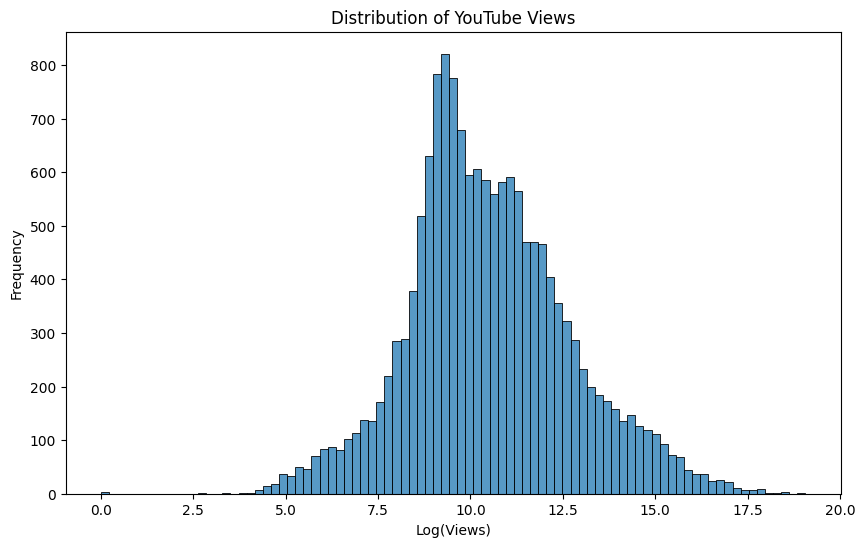

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['logviews'], bins='auto', kde=False)
plt.title('Distribution of YouTube Views')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.show()

We notice a "gaussian" distribution. When creating our validation datasets, we will have to sample according to the underlying distribution.

A large number of videos is located in a bin of which we are going to determine the value :

In [14]:
min_val = total_ds['logviews'].min()
max_val = total_ds['logviews'].max()
fine_bin_edges = np.linspace(min_val, max_val, 101)  # 101 edges for 100 bins

# Assign each video to a bin
fine_bins = pd.cut(total_ds['logviews'], bins=fine_bin_edges, include_lowest=True)

# Count videos in each bin
bin_counts = fine_bins.value_counts().sort_index()

# Find the bin with the most videos
max_bin = bin_counts.idxmax()
max_count = bin_counts.max()

# Get the actual range of logviews for this bin
bin_start = max_bin.left
bin_end = max_bin.right

print(f"The bin with the most videos is from {bin_start:.2f} to {bin_end:.2f}")
print(f"This bin contains {max_count} videos ({(max_count/len(total_ds)*100):.2f}% of the dataset)")
print(f"The midpoint of this bin is {(bin_start + bin_end)/2:.2f}")

# This will be our target mean when creating our datasets
target_mean = (bin_start + bin_end) / 2

The bin with the most videos is from 9.15 to 9.34
This bin contains 712 videos (3.77% of the dataset)
The midpoint of this bin is 9.25


In [15]:
print(f"Mean of logviews: {total_ds['logviews'].mean()}")
print(f"Median of logviews: {total_ds['logviews'].median()}")
print(f"Standard deviation of logviews: {total_ds['logviews'].std()}")

Mean of logviews: 10.496736815122684
Median of logviews: 10.285189199446592
Standard deviation of logviews: 2.20000444029865


Let's study the distribution of the temporal features.

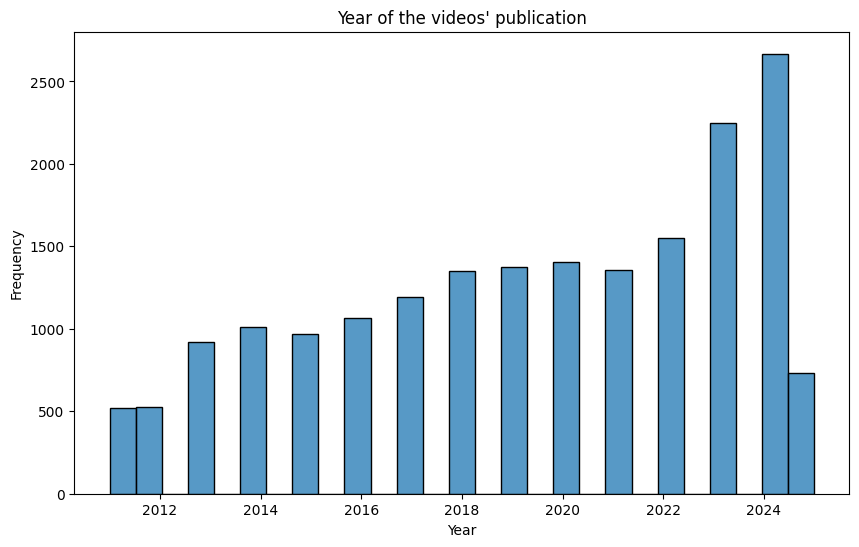

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['year'], bins='auto', kde=False)
plt.title("Year of the videos' publication")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

As we can see, this distribution is not quite equilibrated.

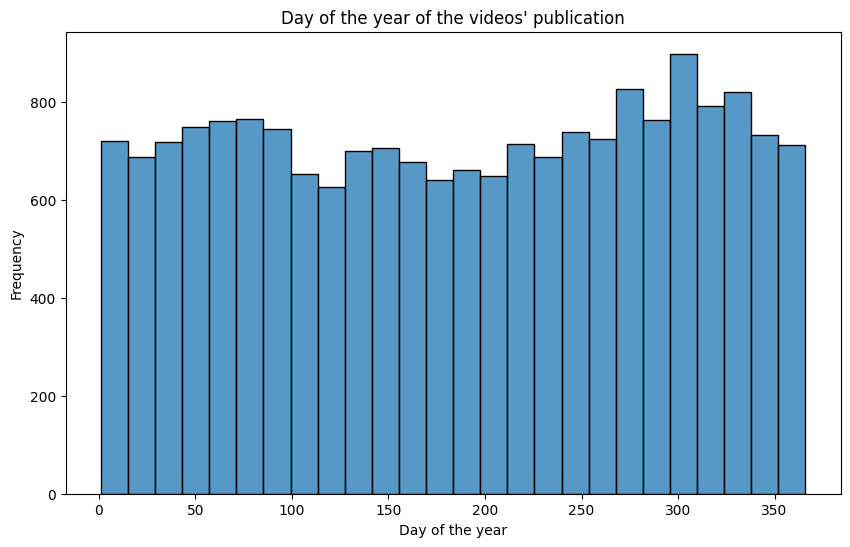

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['dayofyear'], bins='auto', kde=False)
plt.title("Day of the year of the videos' publication")
plt.xlabel('Day of the year')
plt.ylabel('Frequency')
plt.show()

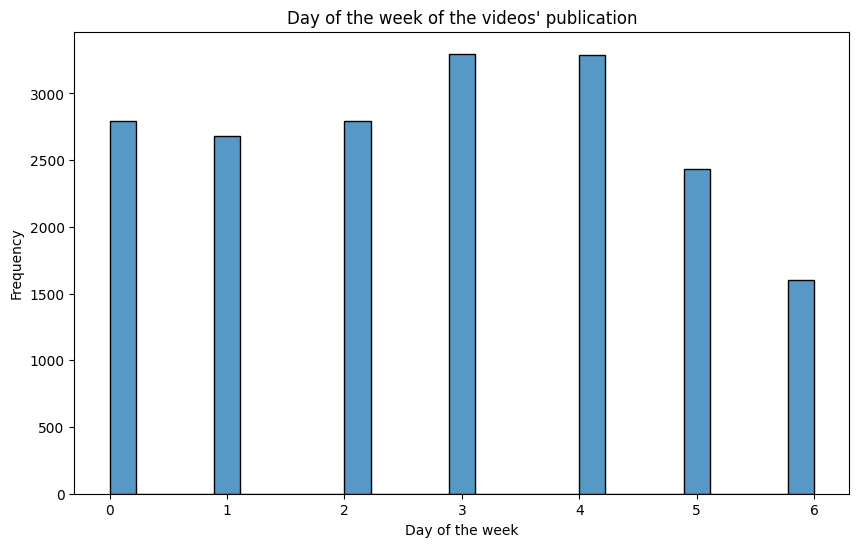

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['dayofweek'], bins='auto', kde=False)
plt.title("Day of the week of the videos' publication")
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.show()

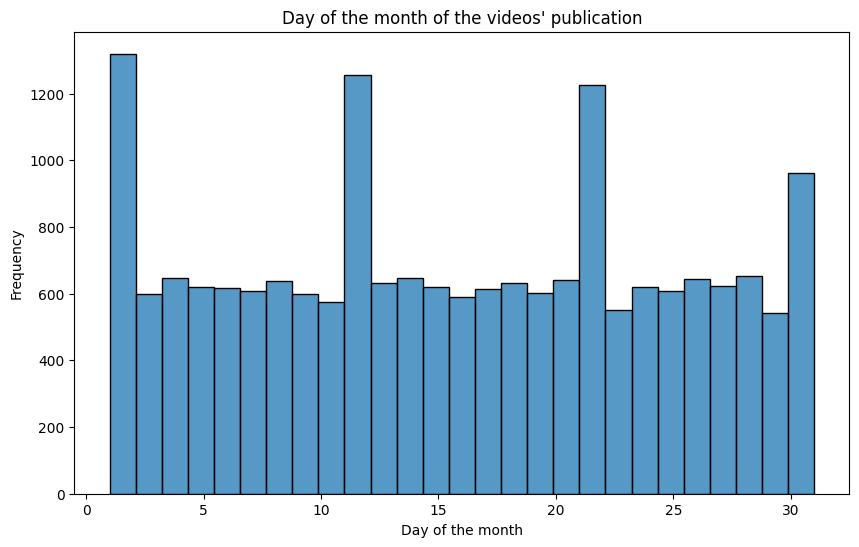

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['dayofmonth'], bins='auto', kde=False)
plt.title("Day of the month of the videos' publication")
plt.xlabel('Day of the month')
plt.ylabel('Frequency')
plt.show()

As we can see, this distribution is not quite equilibrated too. I don't know what those spikes refer to as they don't seem to refer to the same day of the week.

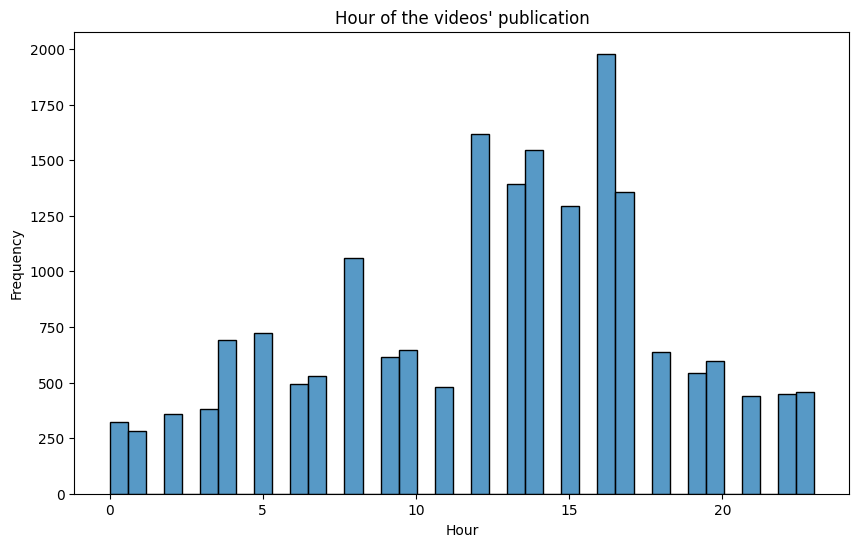

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(total_ds['hour'], bins='auto', kde=False)
plt.title("Hour of the videos' publication")
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

And the same goes for the hours' distribution.

For the sake of curiosity, let's see how the day of the year influences the number of views (maybe there are more views during the holidays ?)

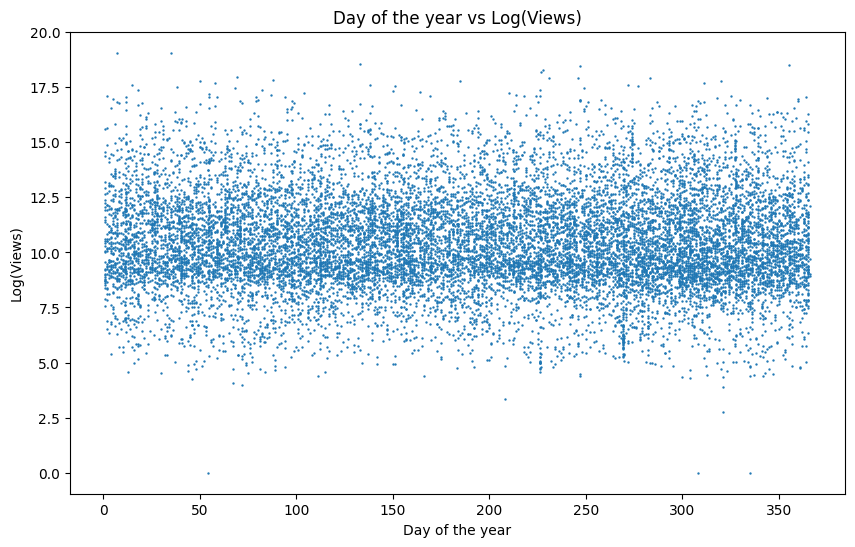

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(total_ds['dayofyear'], total_ds['logviews'], s=0.5)
plt.title("Day of the year vs Log(Views)")
plt.xlabel('Day of the year')
plt.ylabel('Log(Views)')
plt.show()

I cannot tell to be honest.

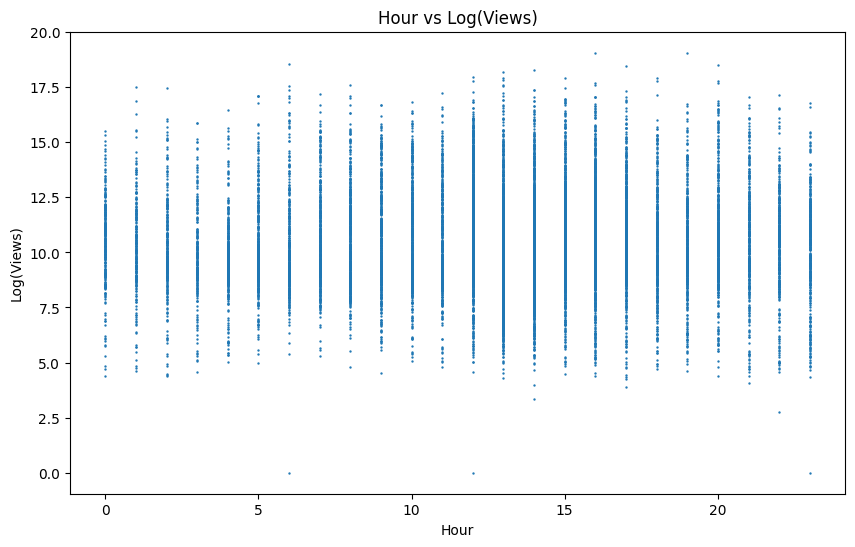

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(total_ds['hour'], total_ds['logviews'], s=0.5)
plt.title("Hour vs Log(Views)")
plt.xlabel('Hour')
plt.ylabel('Log(Views)')
plt.show()

The hour does not seem to have a huge impact.

### **Channels**

Let's study the influence of the channels.

In [23]:
print(total_ds['channel'].nunique())

46


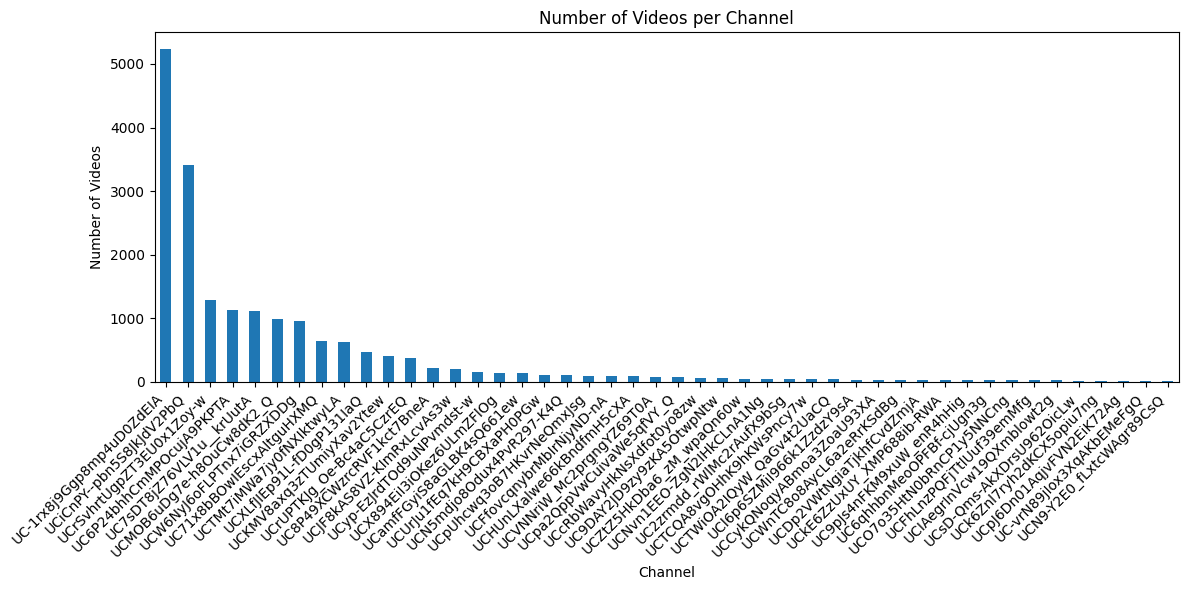

In [24]:
channel_counts = total_ds['channel'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
channel_counts.plot(kind='bar')
plt.title('Number of Videos per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There are only 46 different channels, but some have considerably more videos than others, so this will be a problem (under represented classes).

In [25]:
list_channel = total_ds['channel'].values.tolist()
list_channel = list(set(list_channel))
list_channel

['UC71x8bBOwIEscxAltguHXMQ',
 'UCrSvhrtUgpZT3EU0x1Zoy-w',
 'UCKMV8axq3zTUmiyXav2Ytew',
 'UCIAegrInVcw19QXmblowt2g',
 'UC-vrN89jIox3XqAKbEMeFgQ',
 'UCk6Znl7ryh2dKCX5opiu7ng',
 'UCJF8kAS8VZ-KImRxLcvAs3w',
 'UC6P24bhhCmMPOcujA9PKPTA',
 'UCN9-Y2E0_fLxtcWAgr89CsQ',
 'UCZtZ5HkDba6_zM_wpaQn60w',
 'UCMOB6uDg7e-h8OuCw8dK2_Q',
 'UCNvn1EEO-ZgN2IHkCLnA1Ng',
 'UCiCnPY--pbn5S8JkJdV2PbQ',
 'UCCykQNoqyABmoa3ZoaU93XA',
 'UCrUPTKJg_Oe-Bc4aC5CzrEQ',
 'UC9DAY2JD9zy9zKA5OtwpNtw',
 'UCpJ6Dn01AqjvFVN2EiK72Ag',
 'UCXLfJIEp91L-fD0gP131IaQ',
 'UCTMt7iMWa7jy0fNXIktwyLA',
 'UCTCQA8vgOHhK9hKWsPncy7w',
 'UCWnTC8o8AycL6a2eRrKSdBg',
 'UCFhLnzPQFjTtlUuf39emMfg',
 'UC7sDT8jZ76VLV1u__krUutA',
 'UC-1rx8j9Ggp8mp4uD0ZdEIA',
 'UC2zrmdd_rWlMc2rAufX9bSg',
 'UCkE6ZzUxUY_XMP688ib-RWA',
 'UC8P49XCWzrcRVF1kct7BneA',
 'UCUrJu1fEq7kH9CBXaPH0PGw',
 'UCcRbWavyHkNsXdfot0yo8zw',
 'UCyp-EzJrdTOd9uNPvmdst-w',
 'UCW6NyJ6oFLPTnx7iGRZXDDg',
 'UCHUnLXalwe66kBndfmH5cXA',
 'UCO7o35HtN0bRnCP1y5NNCng',
 'UCl6p6SZMiI966k1ZzdzY9sA',
 'UCVNNriW_Mc2

In [26]:
channel_stats = pd.DataFrame({
    'video_count': total_ds['channel'].value_counts(),
    'mean_logviews': total_ds.groupby('channel')['logviews'].mean()
})

channel_stats = channel_stats.sort_values('mean_logviews', ascending=False)

channel_stats = channel_stats.reset_index().rename(columns={'index': 'channel'})

print(channel_stats)

                     channel  video_count  mean_logviews
0   UCkE6ZzUxUY_XMP688ib-RWA           28      15.216200
1   UC-vrN89jIox3XqAKbEMeFgQ           19      13.877723
2   UCWnTC8o8AycL6a2eRrKSdBg           30      13.744508
3   UCTWiOA2IQyW_QaGv4t2UaCQ           38      13.470369
4   UCTMt7iMWa7jy0fNXIktwyLA          630      12.702580
5   UCpJ6Dn01AqjvFVN2EiK72Ag           20      12.560668
6   UCMOB6uDg7e-h8OuCw8dK2_Q          993      11.891446
7   UCrSvhrtUgpZT3EU0x1Zoy-w         1295      11.869290
8   UC7sDT8jZ76VLV1u__krUutA         1115      11.814883
9   UC6P24bhhCmMPOcujA9PKPTA         1136      11.466501
10  UCiCnPY--pbn5S8JkJdV2PbQ         3405      11.126861
11  UCVNNriW_Mc2prgngYZ69T0A           80      11.126722
12  UCyp-EzJrdTOd9uNPvmdst-w          161      11.081957
13  UCX894EiI3iOKez6ULmZFlOg          144      10.933635
14  UCl6p6SZMiI966k1ZzdzY9sA           31      10.867125
15  UCFhLnzPQFjTtlUuf39emMfg           23      10.595866
16  UCsD-Qms-AkXDrsU962OicLw   

This is very interesting, the 'best' channels have a very low number of videos in our dataset.

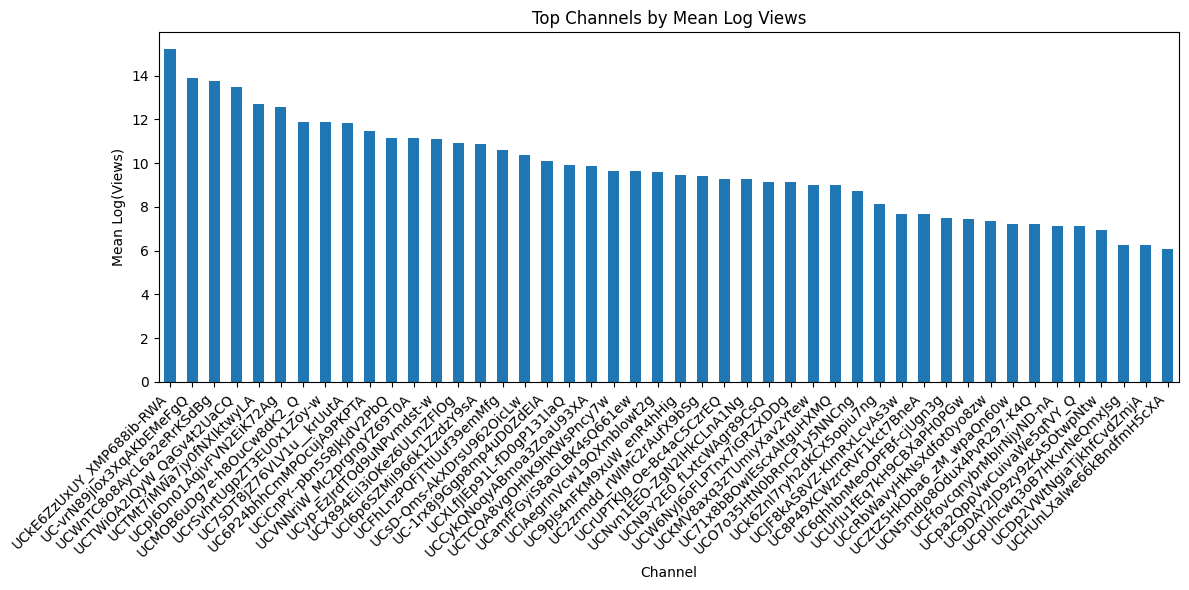

In [27]:
channel_mean_logviews = total_ds.groupby('channel')['logviews'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
channel_mean_logviews.plot(kind='bar')
plt.title('Top Channels by Mean Log Views')
plt.xlabel('Channel')
plt.ylabel('Mean Log(Views)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Some channels have tremendously more fame than others (keep in mind that the number of views is scaled logarithmically), so the channel will be an extremely important feature in predicting the number of views.

In [28]:
total_ds.columns

Index(['id', 'channel', 'title', 'description', 'views', 'year', 'month',
       'dayofmonth', 'hour', 'dayofweek', 'dayofyear', 'logviews'],
      dtype='object')

We are going to try to identify the most informative channels.

Let's check the channels' variances.

In [29]:
train_data = total_ds[total_ds['views'].notna()]

variance_by_channel = train_data.groupby('channel')['logviews'].var().sort_values(ascending=False)

variance_df = pd.DataFrame({
    'channel': variance_by_channel.index,
    'logviews_variance': variance_by_channel.values,
    'video_count': train_data['channel'].value_counts()[variance_by_channel.index].values
})

print(variance_df)

                     channel  logviews_variance  video_count
0   UCrUPTKJg_Oe-Bc4aC5CzrEQ          10.915860            4
1   UCIAegrInVcw19QXmblowt2g          10.092131           22
2   UCDp2VWtNgiaTjkhfCvdZmjA           6.152511           19
3   UCrSvhrtUgpZT3EU0x1Zoy-w           5.129487         1218
4   UCN9-Y2E0_fLxtcWAgr89CsQ           4.807042           13
5   UCcRbWavyHkNsXdfot0yo8zw           4.803629           58
6   UCk6Znl7ryh2dKCX5opiu7ng           4.747587            7
7   UCiCnPY--pbn5S8JkJdV2PbQ           4.650157         2218
8   UCVNNriW_Mc2prgngYZ69T0A           4.625932           73
9   UCXLfJIEp91L-fD0gP131IaQ           4.618079          437
10  UCW6NyJ6oFLPTnx7iGRZXDDg           4.447892          771
11  UC6qhhbnMeoOPFBf-cjUgn3g           4.039002           16
12  UCFfovcqnybrMbIrNjyND-nA           3.917063           68
13  UCUrJu1fEq7kH9CBXaPH0PGw           3.895005          111
14  UCJF8kAS8VZ-KImRxLcvAs3w           3.688249          156
15  UCyp-EzJrdTOd9uNPvmd

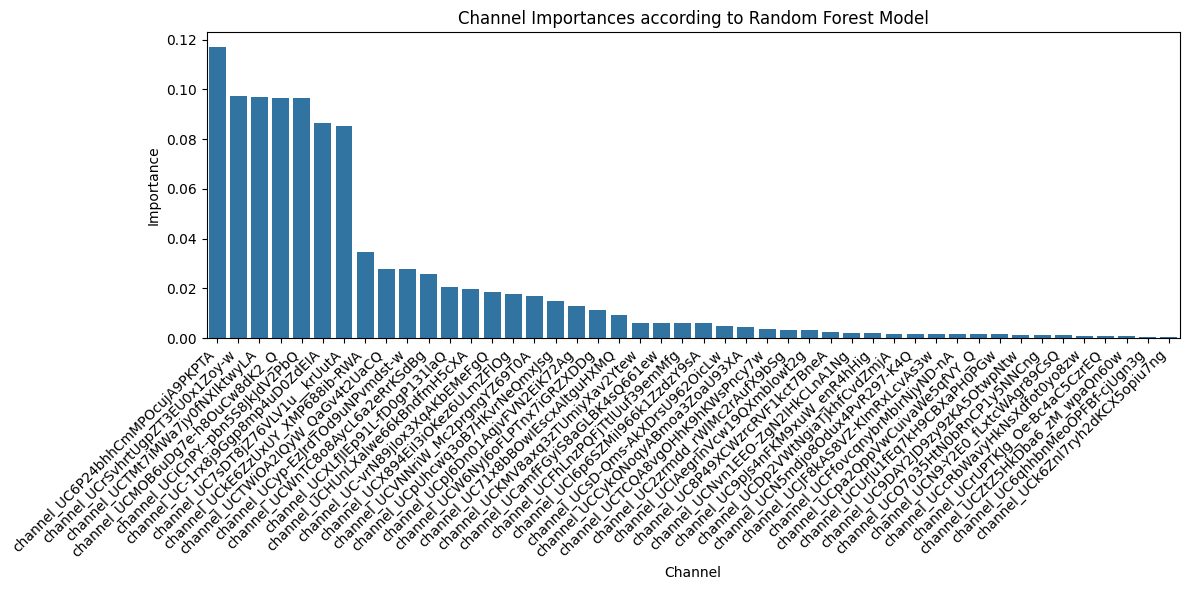

In [30]:
# To analyze the importance of each channel in predicting views, we can use a Random Forest model

# Prepare data
X = pd.get_dummies(train_data[['channel']])
y = train_data['logviews']

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns # Watch out : the get dummies function may change the channel names
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=importance_df)
plt.title('Channel Importances according to Random Forest Model')
plt.xlabel('Channel')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can clearly see that some channels are way more important than others. Based on the graph, we could keep the 20 first channels and group the others in an "Other" category.

In [31]:
best_channels = importance_df.head(20)['feature'].values
cleaned_best_channels = [channel.replace('channel_', '') for channel in best_channels]
cleaned_best_channels

['UC6P24bhhCmMPOcujA9PKPTA',
 'UCrSvhrtUgpZT3EU0x1Zoy-w',
 'UCTMt7iMWa7jy0fNXIktwyLA',
 'UCMOB6uDg7e-h8OuCw8dK2_Q',
 'UCiCnPY--pbn5S8JkJdV2PbQ',
 'UC-1rx8j9Ggp8mp4uD0ZdEIA',
 'UC7sDT8jZ76VLV1u__krUutA',
 'UCkE6ZzUxUY_XMP688ib-RWA',
 'UCTWiOA2IQyW_QaGv4t2UaCQ',
 'UCyp-EzJrdTOd9uNPvmdst-w',
 'UCWnTC8o8AycL6a2eRrKSdBg',
 'UCXLfJIEp91L-fD0gP131IaQ',
 'UCHUnLXalwe66kBndfmH5cXA',
 'UC-vrN89jIox3XqAKbEMeFgQ',
 'UCX894EiI3iOKez6ULmZFlOg',
 'UCVNNriW_Mc2prgngYZ69T0A',
 'UCpUhcwq3oB7HKvrNeQmxJsg',
 'UCpJ6Dn01AqjvFVN2EiK72Ag',
 'UCW6NyJ6oFLPTnx7iGRZXDDg',
 'UC71x8bBOwIEscxAltguHXMQ']

In [32]:
# For the creation of our datasets (see below), we will try to equilibrate the number of videos of the best 7 channels.

best_channels = cleaned_best_channels[:7]
best_channels

['UC6P24bhhCmMPOcujA9PKPTA',
 'UCrSvhrtUgpZT3EU0x1Zoy-w',
 'UCTMt7iMWa7jy0fNXIktwyLA',
 'UCMOB6uDg7e-h8OuCw8dK2_Q',
 'UCiCnPY--pbn5S8JkJdV2PbQ',
 'UC-1rx8j9Ggp8mp4uD0ZdEIA',
 'UC7sDT8jZ76VLV1u__krUutA']

In [33]:
# Let's check how well these channels are represented in the dataset

best_channels_counts = total_ds[total_ds['channel'].isin(best_channels)]['channel'].value_counts()
best_channels_counts

channel
UC-1rx8j9Ggp8mp4uD0ZdEIA    5236
UCiCnPY--pbn5S8JkJdV2PbQ    3405
UCrSvhrtUgpZT3EU0x1Zoy-w    1295
UC6P24bhhCmMPOcujA9PKPTA    1136
UC7sDT8jZ76VLV1u__krUutA    1115
UCMOB6uDg7e-h8OuCw8dK2_Q     993
UCTMt7iMWa7jy0fNXIktwyLA     630
Name: count, dtype: int64

Fortunately, these numbers are decent.

## **Pre-processing**

### **Description**

Some videos do not have a description :

In [34]:
nb_no_desc = total_ds['description'].isna().sum()
nb_no_desc

np.int64(926)

So we fill their description with an empty string

In [154]:
total_ds['description'] = total_ds['description'].fillna('')

In [35]:
total_ds.columns

Index(['id', 'channel', 'title', 'description', 'views', 'year', 'month',
       'dayofmonth', 'hour', 'dayofweek', 'dayofyear', 'logviews'],
      dtype='object')

### **Title**

In [36]:
nb_no_title = total_ds['title'].isna().sum()
nb_no_title

np.int64(0)

In [37]:
for i in range(len(total_ds)):
    for char in total_ds['title'].iloc[i]:  # This fails when description is NaN
        if not ord(char) < 128:  # Non-ASCII check
            print(f"Non-ASCII character in title of video {total_ds['id'].iloc[i]}: {char}")
            break 

Non-ASCII character in title of video -5cvOGIezgc: চ
Non-ASCII character in title of video -8hyufB9-8g: ভ
Non-ASCII character in title of video -9YpIqPb3AI: 🏆
Non-ASCII character in title of video -9bE65z0eX8: স
Non-ASCII character in title of video -AkFvd-3e50: ü
Non-ASCII character in title of video -CjFvtF6RBQ: ’
Non-ASCII character in title of video -EaEjb6yWWw: ই
Non-ASCII character in title of video -KG6yAonxw8: ম
Non-ASCII character in title of video -KR8Y6P_quM: ’
Non-ASCII character in title of video -MjTCLeeLDo: র
Non-ASCII character in title of video -UUYq6MZhxY: 🐮
Non-ASCII character in title of video -WgE1LpU8Xw: প
Non-ASCII character in title of video -XnOLkacJAY: ম
Non-ASCII character in title of video -YBr2RqerlA: ’
Non-ASCII character in title of video -Z7nAg3t2Z4: ব
Non-ASCII character in title of video -aT15Jnu4lw: é
Non-ASCII character in title of video -aWY6VFbsh0: ক
Non-ASCII character in title of video -c9ZTHIrXT0: ä
Non-ASCII character in title of video -daZSCX7

We will need a multilingual model that handles emojis and Bengali !

### **Categorical and cyclic features**

In this problem, the categorical features are 'channel_category' and 'year', while other features like 'month', 'dayofmonth', 'hour', 'dayofweek' and 'dayofyear' can be cyclically encoded.

#### **Cyclic features**

Let's cyclically encode the said features.

In [39]:
total_ds['sin_month'] = np.sin(2 * np.pi * total_ds['month'] / 12)
total_ds['cos_month'] = np.cos(2 * np.pi * total_ds['month'] / 12)

total_ds['sin_dayofmonth'] = np.sin(2 * np.pi * total_ds['dayofmonth'] / 31) # The difference between 31 and 30 is not important
total_ds['cos_dayofmonth'] = np.cos(2 * np.pi * total_ds['dayofmonth'] / 31)

total_ds['sin_hour'] = np.sin(2 * np.pi * total_ds['hour'] / 24)
total_ds['cos_hour'] = np.cos(2 * np.pi * total_ds['hour'] / 24)

total_ds['sin_dayofweek'] = np.sin(2 * np.pi * total_ds['dayofweek'] / 7)
total_ds['cos_dayofweek'] = np.cos(2 * np.pi * total_ds['dayofweek'] / 7)

total_ds['sin_dayofyear'] = np.sin(2 * np.pi * total_ds['dayofyear'] / 365) # same for lap years
total_ds['cos_dayofyear'] = np.cos(2 * np.pi * total_ds['dayofyear'] / 365)

We notice that in the test set, every video was published in 2024 or 2025, whereas in the Test set, no video was published in these years. Therefore, we are going to assign 0 to 2011 and 1 to 2025, and an adequate number between 0 and 1 to the other years.

In [40]:
total_ds

,id,channel,title,description,views,year,month,dayofmonth,hour,dayofweek,...,sin_month,cos_month,sin_dayofmonth,cos_dayofmonth,sin_hour,cos_hour,sin_dayofweek,cos_dayofweek,sin_dayofyear,cos_dayofyear
0,--2s6hjGrm4,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI & VFX Breakdowns: ""Warzone"" - by Ramesh Th...","Check out this revealing VFX Breakdown ""Warzon...",12299.0,2020,12,15,5,1,...,-2.449294e-16,1.000000e+00,0.101168,-0.994869,0.965926,2.588190e-01,0.781831,0.623490,-0.255353,0.966848
1,--DnfroyKQ8,UC-1rx8j9Ggp8mp4uD0ZdEIA,"A Sci-Fi Short Film: ""Exit"" - by Ng King Kwan ...","TheCGBros Presents ""Exit"" by Ng King Kwan - Th...",7494.0,2020,7,1,16,2,...,-5.000000e-01,-8.660254e-01,0.201299,0.979530,-0.866025,-5.000000e-01,0.974928,-0.222521,-0.008607,-0.999963
2,--aiU7VQKEw,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI 3D Animated Short: ""Lost Love"" - by Akash ...","TheCGBros Presents ""Lost Love"" by Akash Manack...",11831.0,2019,2,18,20,0,...,8.660254e-01,5.000000e-01,-0.485302,-0.874347,-0.866025,5.000000e-01,0.000000,1.000000,0.746972,0.664855
3,-0SrlZAvSVM,UCW6NyJ6oFLPTnx7iGRZXDDg,Jo Goes Hunting - Careful | Animated music vid...,"On the borderless map of a magical planet, lit...",2248.0,2020,3,10,14,1,...,1.000000e+00,6.123234e-17,0.897805,-0.440394,-0.500000,-8.660254e-01,0.781831,0.623490,0.933837,0.357698
4,-13Y2Pe7kFs,UC-1rx8j9Ggp8mp4uD0ZdEIA,"CGI VFX Breakdown: ""Logan (Wolverine): Digital...",Check out this outstanding behind-the-scenes l...,113806.0,2017,9,20,20,2,...,-1.000000e+00,-1.836970e-16,-0.790776,-0.612106,-0.866025,5.000000e-01,0.974928,-0.222521,-0.982927,-0.183998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,UCamfFGyiS8aGLBK4sQ661ew,VISKAR I VINDEN | Omeleto Comedy,A man investigates a murder.\n\n\nVISKAR I VIN...,NaN,2024,1,24,6,2,...,5.000000e-01,8.660254e-01,-0.988468,0.151428,1.000000,6.123234e-17,0.974928,-0.222521,0.401488,0.915864
3398,3398,UCKMV8axq3zTUmiyXav2Ytew,THE SESSION | Omeleto Drama,A musician is chained to a piano.\n\n\nTHE SES...,NaN,2024,1,18,6,3,...,5.000000e-01,8.660254e-01,-0.485302,-0.874347,1.000000,6.123234e-17,0.433884,-0.900969,0.304921,0.952378
3399,3399,UCKMV8axq3zTUmiyXav2Ytew,REVENGE OF THE ELECTRIC CART | Omeleto Drama,A young girl overcome prejudice.\n\n\nREVENGE ...,NaN,2024,2,10,5,5,...,8.660254e-01,5.000000e-01,0.897805,-0.440394,0.965926,2.588190e-01,-0.974928,-0.222521,0.648630,0.761104
3400,3400,UCTMt7iMWa7jy0fNXIktwyLA,LIKENESS | Omeleto,A young woman investigates her mother's disapp...,NaN,2024,2,26,5,0,...,8.660254e-01,5.000000e-01,-0.848644,0.528964,0.965926,2.588190e-01,0.000000,1.000000,0.831171,0.556017


In [41]:
total_ds['year'] = (total_ds['year'] - 2011)/(2025 - 2011) # Normalization
total_ds['year'].value_counts()

year
0.928571    2668
0.857143    2246
0.785714    1551
0.642857    1403
0.571429    1377
0.714286    1358
0.500000    1352
0.428571    1191
0.357143    1065
0.214286    1010
0.285714     968
0.142857     921
1.000000     734
0.071429     523
0.000000     517
Name: count, dtype: int64

#### **Categorical Features**

For the categorical features, we use one-hot encoding.

In [42]:
# One-hot encoding for categorical variables

dummies = pd.get_dummies(total_ds['channel'], drop_first=False)
dummies = dummies.astype(int)

total_ds = pd.concat([total_ds, dummies], axis=1)

# Drop now useless columns
total_ds.drop(columns=['channel', 'month', 'dayofmonth', 'hour', 'dayofweek', 'dayofyear'], inplace=True)
total_ds.columns

Index(['id', 'title', 'description', 'views', 'year', 'logviews', 'sin_month',
       'cos_month', 'sin_dayofmonth', 'cos_dayofmonth', 'sin_hour', 'cos_hour',
       'sin_dayofweek', 'cos_dayofweek', 'sin_dayofyear', 'cos_dayofyear',
       'UC-1rx8j9Ggp8mp4uD0ZdEIA', 'UC-vrN89jIox3XqAKbEMeFgQ',
       'UC2zrmdd_rWlMc2rAufX9bSg', 'UC6P24bhhCmMPOcujA9PKPTA',
       'UC6qhhbnMeoOPFBf-cjUgn3g', 'UC71x8bBOwIEscxAltguHXMQ',
       'UC7sDT8jZ76VLV1u__krUutA', 'UC8P49XCWzrcRVF1kct7BneA',
       'UC9DAY2JD9zy9zKA5OtwpNtw', 'UC9pJs4nFKM9xuW_enR4hHig',
       'UCCykQNoqyABmoa3ZoaU93XA', 'UCDp2VWtNgiaTjkhfCvdZmjA',
       'UCFfovcqnybrMbIrNjyND-nA', 'UCFhLnzPQFjTtlUuf39emMfg',
       'UCHUnLXalwe66kBndfmH5cXA', 'UCIAegrInVcw19QXmblowt2g',
       'UCJF8kAS8VZ-KImRxLcvAs3w', 'UCKMV8axq3zTUmiyXav2Ytew',
       'UCMOB6uDg7e-h8OuCw8dK2_Q', 'UCN5mdjo8Odux4PvR297-K4Q',
       'UCN9-Y2E0_fLxtcWAgr89CsQ', 'UCNvn1EEO-ZgN2IHkCLnA1Ng',
       'UCO7o35HtN0bRnCP1y5NNCng', 'UCTCQA8vgOHhK9hKWsPncy7w',
       'UC

Now the idea will be to train models to encode the thumbnail, the title and the description, and add on top of it a regression layer that regresses the number of views. Then, we fine-tune this whole model, and use its encoder part to convert the thumbnail, the title and the description to tabular features. We will then be able to test various models on this tabular set of features such as an MLP, an XGBoost, Random Forests... Or even do an assemble model.

## **Creation of appropriate training and validation datasets**

One of the submissions we have done has had a nice score, but it only predicted one value, which should be the mean of the hidden test set.

In [43]:
prep_training = total_ds[total_ds['logviews'].notna()]
prep_test = total_ds[total_ds['logviews'].isna()]
prep_training

,id,title,description,views,year,logviews,sin_month,cos_month,sin_dayofmonth,cos_dayofmonth,...,UCk6Znl7ryh2dKCX5opiu7ng,UCkE6ZzUxUY_XMP688ib-RWA,UCl6p6SZMiI966k1ZzdzY9sA,UCpJ6Dn01AqjvFVN2EiK72Ag,UCpUhcwq3oB7HKvrNeQmxJsg,UCpa2QppVwCuivaWe5qfVY_Q,UCrSvhrtUgpZT3EU0x1Zoy-w,UCrUPTKJg_Oe-Bc4aC5CzrEQ,UCsD-Qms-AkXDrsU962OicLw,UCyp-EzJrdTOd9uNPvmdst-w
0,--2s6hjGrm4,"CGI & VFX Breakdowns: ""Warzone"" - by Ramesh Th...","Check out this revealing VFX Breakdown ""Warzon...",12299.0,0.642857,9.417355,-2.449294e-16,1.000000e+00,0.101168,-0.994869,...,0,0,0,0,0,0,0,0,0,0
1,--DnfroyKQ8,"A Sci-Fi Short Film: ""Exit"" - by Ng King Kwan ...","TheCGBros Presents ""Exit"" by Ng King Kwan - Th...",7494.0,0.642857,8.921991,-5.000000e-01,-8.660254e-01,0.201299,0.979530,...,0,0,0,0,0,0,0,0,0,0
2,--aiU7VQKEw,"CGI 3D Animated Short: ""Lost Love"" - by Akash ...","TheCGBros Presents ""Lost Love"" by Akash Manack...",11831.0,0.571429,9.378563,8.660254e-01,5.000000e-01,-0.485302,-0.874347,...,0,0,0,0,0,0,0,0,0,0
3,-0SrlZAvSVM,Jo Goes Hunting - Careful | Animated music vid...,"On the borderless map of a magical planet, lit...",2248.0,0.642857,7.718241,1.000000e+00,6.123234e-17,0.897805,-0.440394,...,0,0,0,0,0,0,0,0,0,0
4,-13Y2Pe7kFs,"CGI VFX Breakdown: ""Logan (Wolverine): Digital...",Check out this outstanding behind-the-scenes l...,113806.0,0.428571,11.642259,-1.000000e+00,-1.836970e-16,-0.790776,-0.612106,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15477,luPsBdTuRnY,TOONOCALYPSE | Omeleto Sci-Fi,Cartoon aliens arrive on Earth.\n\n\nTOONOCALY...,8848.0,0.714286,9.088060,5.000000e-01,8.660254e-01,0.299363,-0.954139,...,0,0,0,0,0,0,0,0,0,0
15478,m4GFVJsP9jA,HUHU ATTACK | Omeleto Horror,Two strangers fall in love.\n\n\nHUHU ATTACK i...,2940.0,0.857143,7.986505,-5.000000e-01,8.660254e-01,0.485302,-0.874347,...,0,0,0,0,0,0,0,0,0,0
15479,mAO1ZbLDr74,THREE SACKS FULL OF HATS | Omeleto Drama,A man faces his family.\n\n\nTHREE SACKS FULL ...,10595.0,0.642857,9.268232,-2.449294e-16,1.000000e+00,-0.998717,-0.050649,...,0,0,0,0,0,0,0,0,0,0
15480,mOBI8dVoHXU,SC 4 | Omeleto Drama,A woman wakes up in an overturned car.\n\n\nSC...,4689.0,0.785714,8.453188,5.000000e-01,8.660254e-01,0.848644,0.528964,...,0,0,0,0,0,0,0,0,0,0


In [44]:
prep_test

,id,title,description,views,year,logviews,sin_month,cos_month,sin_dayofmonth,cos_dayofmonth,...,UCk6Znl7ryh2dKCX5opiu7ng,UCkE6ZzUxUY_XMP688ib-RWA,UCl6p6SZMiI966k1ZzdzY9sA,UCpJ6Dn01AqjvFVN2EiK72Ag,UCpUhcwq3oB7HKvrNeQmxJsg,UCpa2QppVwCuivaWe5qfVY_Q,UCrSvhrtUgpZT3EU0x1Zoy-w,UCrUPTKJg_Oe-Bc4aC5CzrEQ,UCsD-Qms-AkXDrsU962OicLw,UCyp-EzJrdTOd9uNPvmdst-w
0,0,নিজের অতীত ভুলে গেলে #bengalimovies #banglacin...,Enjoy and stay connected with us!!\n\nSubscrib...,NaN,0.928571,NaN,-2.449294e-16,1.000000e+00,-0.651372,-0.758758,...,0,0,0,0,0,0,0,0,0,0
1,1,2024: A YEAR IN FILMS,"Here we are, at the end of another cinematic y...",NaN,0.928571,NaN,-5.000000e-01,8.660254e-01,-0.937752,0.347305,...,0,0,0,0,0,0,0,0,0,0
2,2,Short film on Argentina's military dictatorshi...,"Argentina, on 1983. A woman dedicates her whol...",NaN,0.928571,NaN,-1.000000e+00,-1.836970e-16,-0.897805,-0.440394,...,0,0,0,0,0,0,0,0,0,0
3,3,Rupantar | রূপান্তর - Full Movie | Sabyasachi ...,"Watch the Bengali Full Movie ""Rupantar"" Starri...",NaN,0.928571,NaN,-8.660254e-01,5.000000e-01,-0.485302,-0.874347,...,0,0,0,0,0,0,0,0,0,0
4,4,ALEPPO | Omeleto Drama,A doctor suffers a brain injury.\n\n\nALEPPO i...,NaN,0.928571,NaN,-5.000000e-01,-8.660254e-01,-0.724793,0.688967,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,VISKAR I VINDEN | Omeleto Comedy,A man investigates a murder.\n\n\nVISKAR I VIN...,NaN,0.928571,NaN,5.000000e-01,8.660254e-01,-0.988468,0.151428,...,0,0,0,0,0,0,0,0,0,0
3398,3398,THE SESSION | Omeleto Drama,A musician is chained to a piano.\n\n\nTHE SES...,NaN,0.928571,NaN,5.000000e-01,8.660254e-01,-0.485302,-0.874347,...,0,0,0,0,0,0,0,0,0,0
3399,3399,REVENGE OF THE ELECTRIC CART | Omeleto Drama,A young girl overcome prejudice.\n\n\nREVENGE ...,NaN,0.928571,NaN,8.660254e-01,5.000000e-01,0.897805,-0.440394,...,0,0,0,0,0,0,0,0,0,0
3400,3400,LIKENESS | Omeleto,A young woman investigates her mother's disapp...,NaN,0.928571,NaN,8.660254e-01,5.000000e-01,-0.848644,0.528964,...,0,0,0,0,0,0,0,0,0,0


We check that the id's have not been mixed up

In [45]:
prep_test = prep_test.drop(columns=['logviews', 'views'])

## **Quick comparison between training and test sets**

In [46]:
def plot_feature_distribution(df1, df2, feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[feature], bins='auto', kde=False, color='blue', label='Set 1', stat='density')
    sns.histplot(df2[feature], bins='auto', kde=False, color='orange', label='Set 2', stat='density')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def plot_channel_distribution(df1, df2, title, important_channels=None):

    counts1 = []
    total1 = 0
    counts2 = []
    total2 = 0

    for channel in list_channel:
        try:
            nb1 = df1[channel].sum()
            counts1.append(nb1)
            total1 += nb1
        except KeyError:
            counts1.append(0)
        try:
            nb2 = df2[channel].sum()
            total2 += nb2
            counts2.append(nb2)
        except KeyError:
            counts2.append(0)
    frequency1 = np.array(counts1) / total1 if total1 > 0 else np.zeros(len(counts1))
    frequency2 = np.array(counts2) / total2 if total2 > 0 else np.zeros(len(counts2))
    count_df1 = pd.DataFrame({
        'channel': list_channel,
        'count': frequency1
    })
    count_df2 = pd.DataFrame({
        'channel': list_channel,
        'count': frequency2
    })
    plt.figure(figsize=(12, 6))
    sns.barplot(x='channel', y='count', data=count_df1, color='blue', label='Set 1', alpha=0.6)
    sns.barplot(x='channel', y='count', data=count_df2, color='orange', label='Set 2', alpha=0.6)
    plt.title(title)
    plt.xlabel('Channel')
    plt.ylabel('Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend()
    plt.show()

    if important_channels is not None:
        for channel in important_channels:
            print(f"Important Channel {channel} - ratio between the frequencies in the two sets: {frequency2[list_channel.index(channel)] / frequency1[list_channel.index(channel)] if frequency1[list_channel.index(channel)] > 0 else 'undefined'}")

    frequency_dic1, frequency_dic2 = {}, {}
    for channel in important_channels:
        frequency_dic1[channel] = frequency1[list_channel.index(channel)]
        frequency_dic2[channel] = frequency2[list_channel.index(channel)]
    
    return frequency_dic1, frequency_dic2

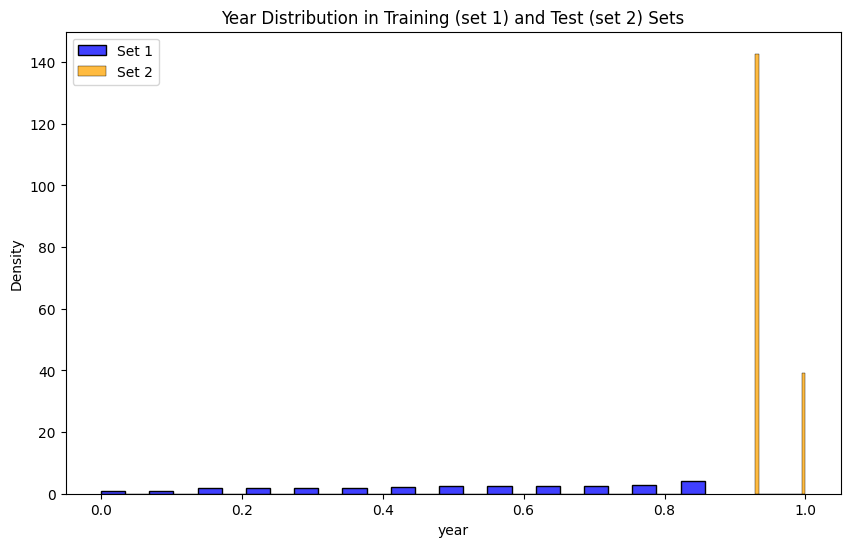

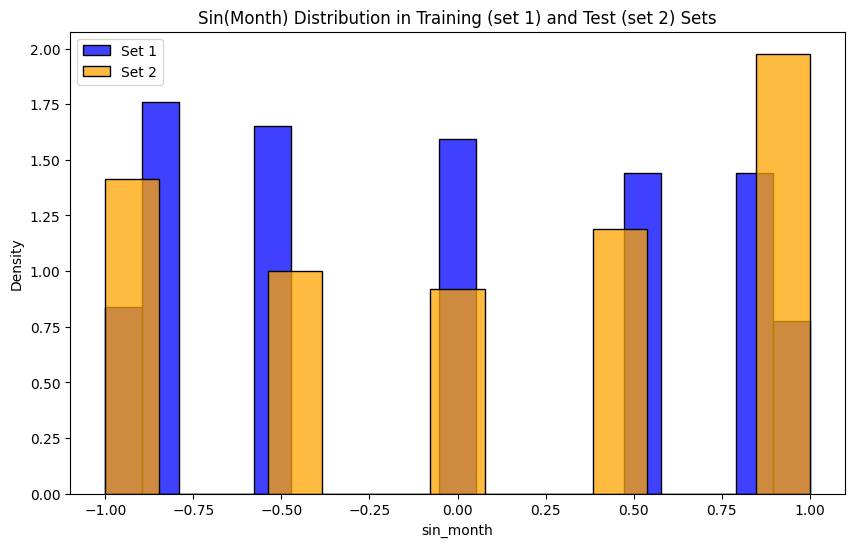

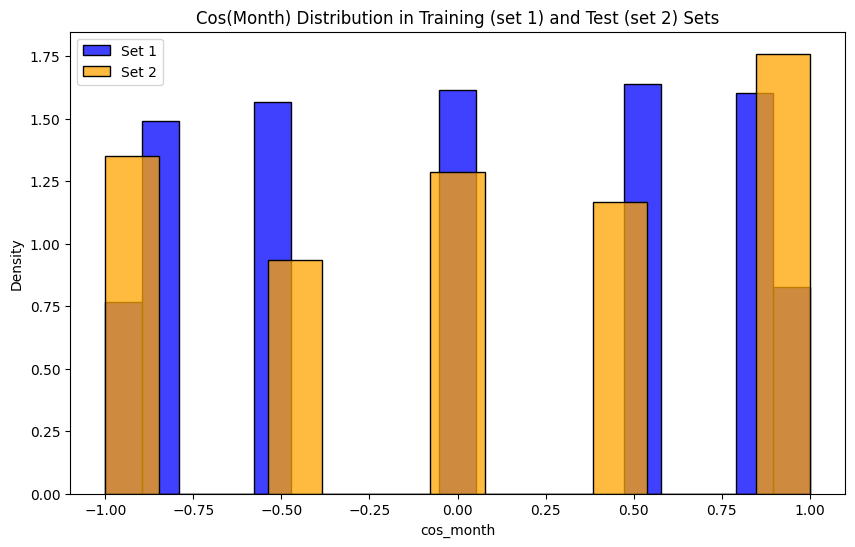

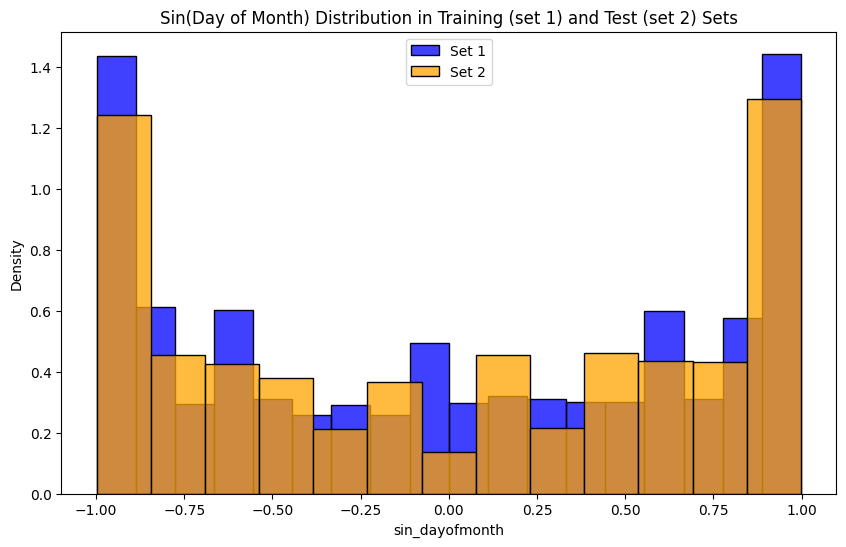

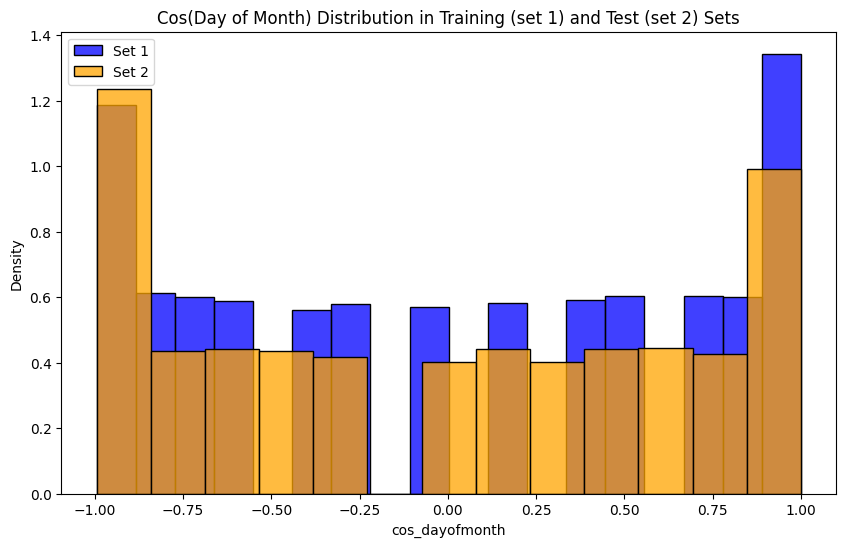

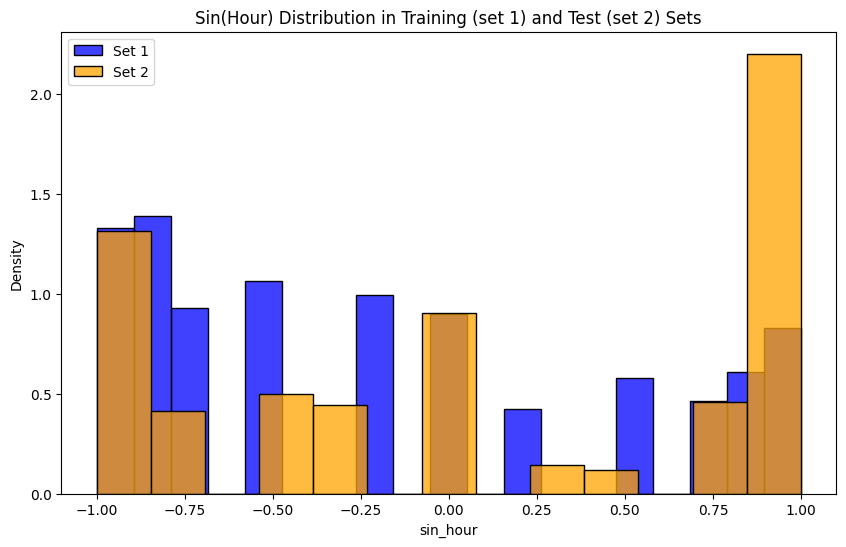

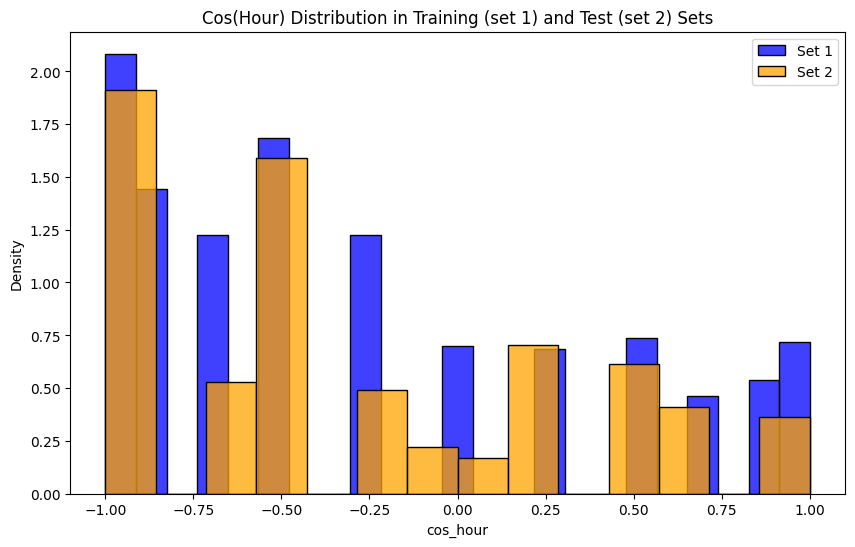

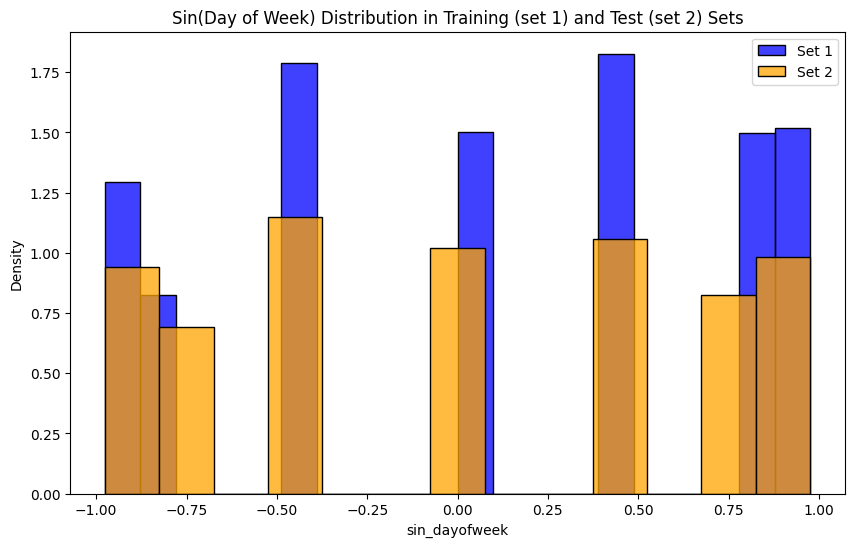

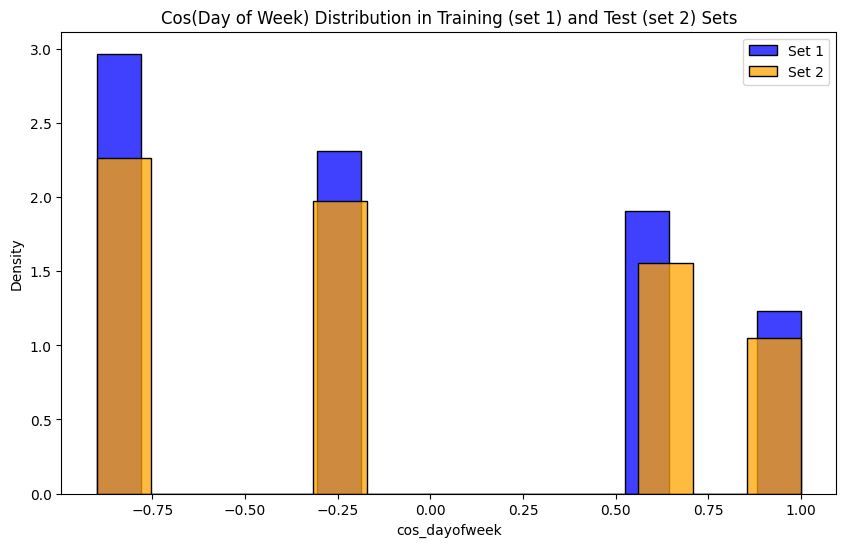

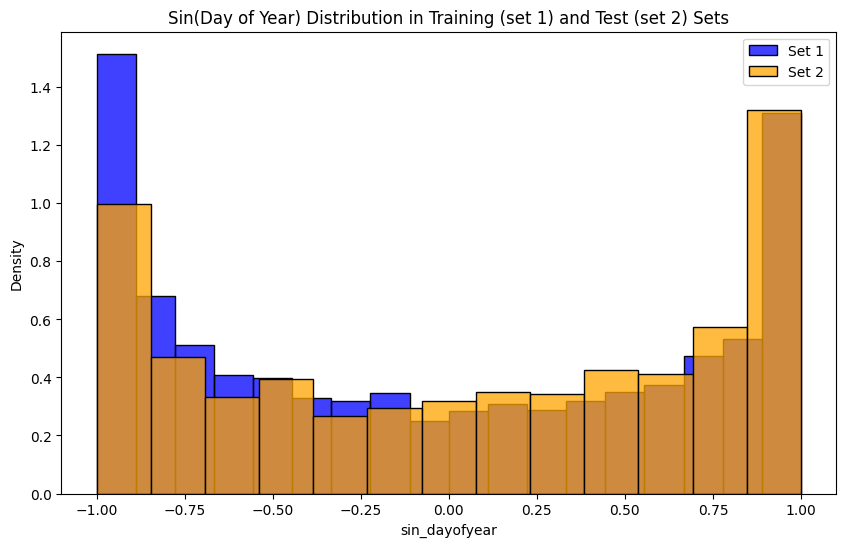

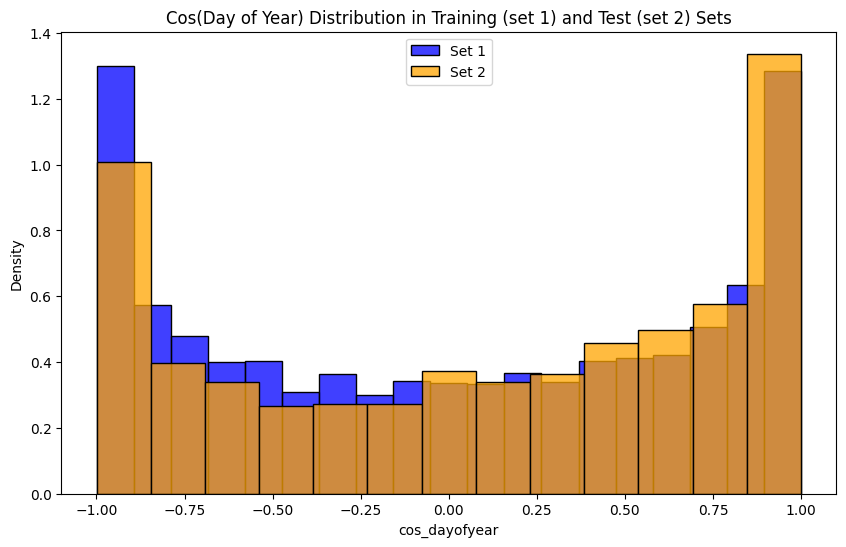

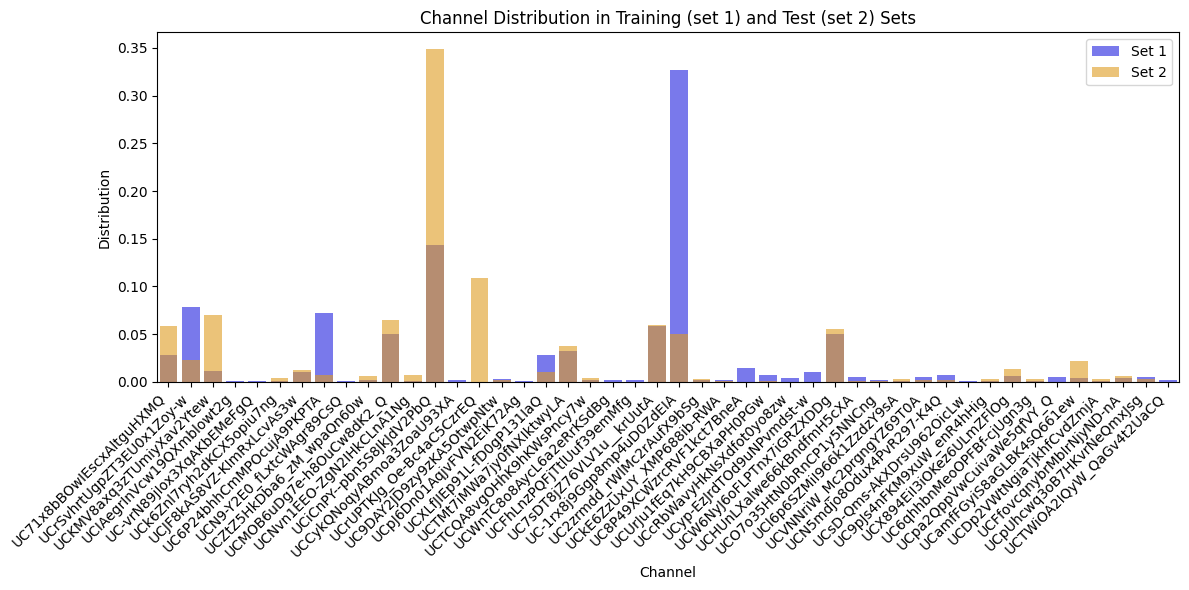

Important Channel UC6P24bhhCmMPOcujA9PKPTA - ratio between the frequencies in the two sets: 0.10240442033621351
Important Channel UCrSvhrtUgpZT3EU0x1Zoy-w - ratio between the frequencies in the two sets: 0.28769756802962426
Important Channel UCTMt7iMWa7jy0fNXIktwyLA - ratio between the frequencies in the two sets: 1.1490223853820056
Important Channel UCMOB6uDg7e-h8OuCw8dK2_Q - ratio between the frequencies in the two sets: 1.3103621810928339
Important Channel UCiCnPY--pbn5S8JkJdV2PbQ - ratio between the frequencies in the two sets: 2.4354652145955624
Important Channel UC-1rx8j9Ggp8mp4uD0ZdEIA - ratio between the frequencies in the two sets: 0.15364180991031928
Important Channel UC7sDT8jZ76VLV1u__krUutA - ratio between the frequencies in the two sets: 1.012963865424879


In [47]:
plot_feature_distribution(prep_training, prep_test, 'year', 'Year Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'sin_month', 'Sin(Month) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'cos_month', 'Cos(Month) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'sin_dayofmonth', 'Sin(Day of Month) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'cos_dayofmonth', 'Cos(Day of Month) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'sin_hour', 'Sin(Hour) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'cos_hour', 'Cos(Hour) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'sin_dayofweek', 'Sin(Day of Week) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'cos_dayofweek', 'Cos(Day of Week) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'sin_dayofyear', 'Sin(Day of Year) Distribution in Training (set 1) and Test (set 2) Sets')
plot_feature_distribution(prep_training, prep_test, 'cos_dayofyear', 'Cos(Day of Year) Distribution in Training (set 1) and Test (set 2) Sets')

_, frequencies_in_test_set = plot_channel_distribution(prep_training, prep_test, 'Channel Distribution in Training (set 1) and Test (set 2) Sets', important_channels=best_channels)

As we can see, in the test set there are only videos from 2024-2025, and some important channels are really over-represented. We are going to make a validation set of recent videos whose repartition in channels matches the test's.

### **Creation of the validation set**

Number of videos from 2021-2023 in training set: 5155


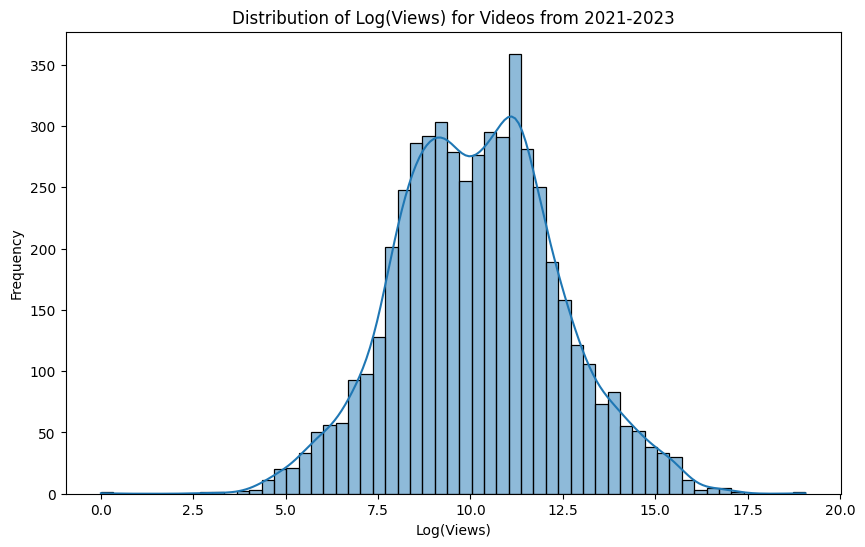

In [48]:
# Creation of the validation set : we only want recent videos, but we also want the distribution of the logviews to be similar to the reality,
# that is to say, we want them to follow a normal distribution whose mean is target_mean

mu, sigma = prep_training['logviews'].mean(), prep_training['logviews'].std()

# First, filter recent videos (published in 2021, 2022 or 2023)
videos_2021_2023 = prep_training[(prep_training['year'] >= (2021-2011)/(2025-2011))]

# Then, we check how the logviews are distributed in this set.

plt.figure(figsize=(10, 6))


# Check how many we have before sampling
print(f"Number of videos from 2021-2023 in training set: {len(videos_2021_2023)}")
sns.histplot(videos_2021_2023['logviews'], bins='auto', kde=True)
plt.title('Distribution of Log(Views) for Videos from 2021-2023')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.show()

In [49]:
def create_stratified_set_with_target_channels(df, n_videos=3500, n_bins=20, 
                                               important_channels=None, target_frequencies=None,
                                               year_threshold=None, 
                                               random_state=42, target_mean=target_mean, fixed_std=2.2):
    """
    Create a dataset that preserves logviews distribution while matching target frequencies
    for specified channels.
    
    Args:
        df: DataFrame containing the dataset
        n_videos: Number of videos to include
        n_bins: Number of bins for logviews stratification
        important_channels: List of channel columns to prioritize
        target_frequencies: Dict mapping channel names to target frequencies
        year_threshold: Optional filter for recent videos
        random_state: Random seed
        target_mean: Target mean for the distribution
        fixed_std: Fixed standard deviation to use
    """
    df_copy = df.copy()
    
    # Filter by year if needed
    if year_threshold:
        year_normalized = (year_threshold - 2011) / (2025 - 2011)
        df_filtered = df_copy[df_copy['year'] >= year_normalized]
    else:
        df_filtered = df_copy
    
    # Get logviews distribution parameters
    mu, sigma = target_mean, fixed_std
    print(f"Target distribution - Mean: {mu:.4f}, Std: {sigma:.4f}")
    
    # Create quantile-based bins
    bin_edges = np.linspace(0, 1, n_bins+1)
    quantiles = [stats.norm.ppf(q, loc=mu, scale=sigma) for q in bin_edges]
    
    # Create output dataframe
    output_df = pd.DataFrame()
    
    # Use target frequencies if provided, otherwise calculate from data
    channel_proportions = {}
    if target_frequencies is not None:
        for channel in important_channels:
            if channel in target_frequencies:
                channel_proportions[channel] = target_frequencies[channel]
            else:
                # Fallback to data proportion if not specified
                channel_proportions[channel] = df_copy[channel].sum() / len(df_copy)
    else:
        # Use original proportions
        for channel in important_channels:
            channel_proportions[channel] = df_copy[channel].sum() / len(df_copy)
    
    # Print target channel proportions
    print("\nTarget channel proportions:")
    for channel, prop in channel_proportions.items():
        print(f"{channel}: {prop:.4f}")
    
    # For each logviews bin
    for i in range(n_bins):
        if i == n_bins - 1:
            bin_mask = (df_filtered['logviews'] >= quantiles[i])
        else:
            bin_mask = (df_filtered['logviews'] >= quantiles[i]) & (df_filtered['logviews'] < quantiles[i+1])
            
        bin_videos = df_filtered[bin_mask]
        target_videos_per_bin = n_videos // n_bins
        
        print(f"Bin {i}: Target {target_videos_per_bin} videos, Available {len(bin_videos)} videos")
        
        # If there aren't enough videos in this bin, take all of them
        if len(bin_videos) <= target_videos_per_bin:
            output_df = pd.concat([output_df, bin_videos])
            continue
            
        # For this logviews bin, try to match channel distribution
        bin_output = pd.DataFrame()
        
        # Calculate expected videos per channel in this bin
        bin_channel_targets = {}
        for channel in important_channels:
            bin_channel_targets[channel] = int(target_videos_per_bin * channel_proportions[channel])
        
        # Handle important channels in order of target proportion (highest first)
        sorted_channels = sorted(important_channels, 
                                key=lambda x: channel_proportions[x], 
                                reverse=True)
        
        remaining_count = target_videos_per_bin
        for channel in sorted_channels:
            # Target videos for this channel in this bin
            channel_target = bin_channel_targets[channel]
            if channel_target == 0:
                continue
                
            # Get videos from this channel in this bin
            channel_videos = bin_videos[bin_videos[channel] == 1]
            
            # Sample videos
            if len(channel_videos) <= channel_target:
                sampled = channel_videos
            else:
                sampled = channel_videos.sample(n=channel_target, random_state=random_state+i)
                
            bin_output = pd.concat([bin_output, sampled])
            remaining_count -= len(sampled)
            
            # Remove selected videos from the bin
            bin_videos = bin_videos[~bin_videos['id'].isin(sampled['id'])]
            
        # Fill remaining slots with random videos from this bin
        if remaining_count > 0 and len(bin_videos) > 0:
            sample_count = min(remaining_count, len(bin_videos))
            remaining_sample = bin_videos.sample(n=sample_count, random_state=random_state+i+100)
            bin_output = pd.concat([bin_output, remaining_sample])
            
        output_df = pd.concat([output_df, bin_output])
    
    # Remove selected videos from original dataset
    remaining_df = df_copy[~df_copy['id'].isin(output_df['id'])]
    
    # Print actual channel proportions achieved
    print("\nActual channel proportions achieved:")
    for channel in important_channels:
        achieved_prop = output_df[channel].sum() / len(output_df)
        target_prop = channel_proportions[channel]
        print(f"{channel}: {achieved_prop:.4f} (target: {target_prop:.4f}, " +
              f"diff: {achieved_prop - target_prop:.4f})")
    
    # Print distribution statistics
    print(f"\nFinal distribution - Mean: {output_df['logviews'].mean():.4f}, " +
          f"Std: {output_df['logviews'].std():.4f}, " +
          f"Min: {output_df['logviews'].min():.4f}, " +
          f"Max: {output_df['logviews'].max():.4f}")
    
    return output_df, remaining_df

In [50]:
val_df, train_df = create_stratified_set_with_target_channels(prep_training, n_videos=2500, n_bins=20, important_channels=best_channels, year_threshold=2017, target_frequencies=frequencies_in_test_set)

Target distribution - Mean: 9.2455, Std: 2.2000

Target channel proportions:
UC6P24bhhCmMPOcujA9PKPTA: 0.0073
UCrSvhrtUgpZT3EU0x1Zoy-w: 0.0226
UCTMt7iMWa7jy0fNXIktwyLA: 0.0373
UCMOB6uDg7e-h8OuCw8dK2_Q: 0.0653
UCiCnPY--pbn5S8JkJdV2PbQ: 0.3489
UC-1rx8j9Ggp8mp4uD0ZdEIA: 0.0503
UC7sDT8jZ76VLV1u__krUutA: 0.0597
Bin 0: Target 125 videos, Available 161 videos
Bin 1: Target 125 videos, Available 230 videos
Bin 2: Target 125 videos, Available 219 videos
Bin 3: Target 125 videos, Available 213 videos
Bin 4: Target 125 videos, Available 237 videos
Bin 5: Target 125 videos, Available 293 videos
Bin 6: Target 125 videos, Available 271 videos
Bin 7: Target 125 videos, Available 396 videos
Bin 8: Target 125 videos, Available 481 videos
Bin 9: Target 125 videos, Available 613 videos
Bin 10: Target 125 videos, Available 627 videos
Bin 11: Target 125 videos, Available 608 videos
Bin 12: Target 125 videos, Available 535 videos
Bin 13: Target 125 videos, Available 539 videos
Bin 14: Target 125 videos, Ava

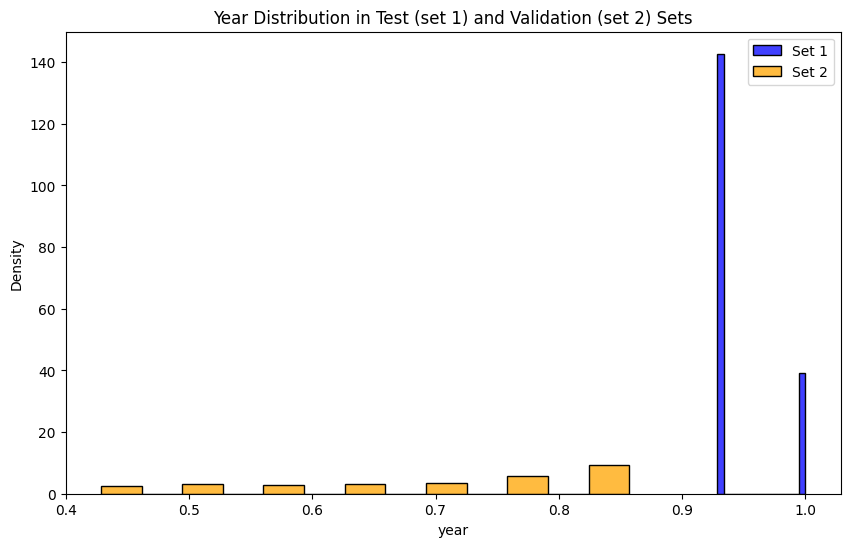

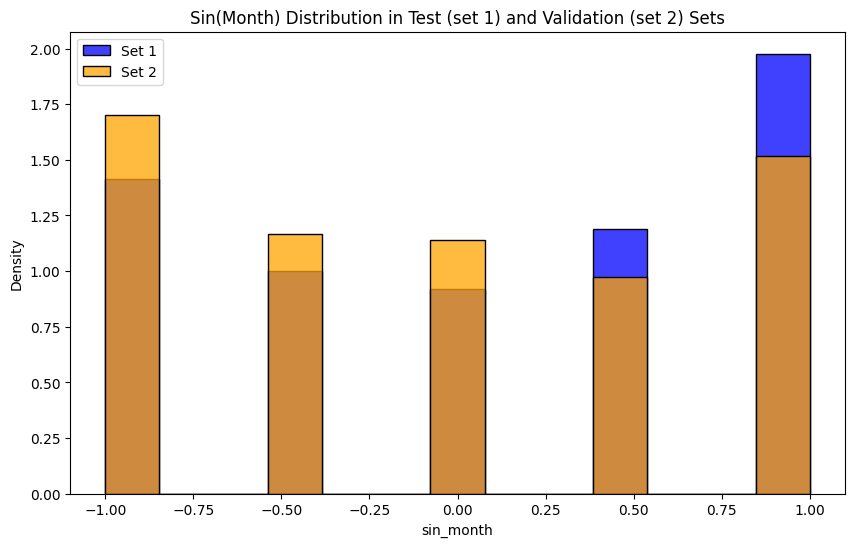

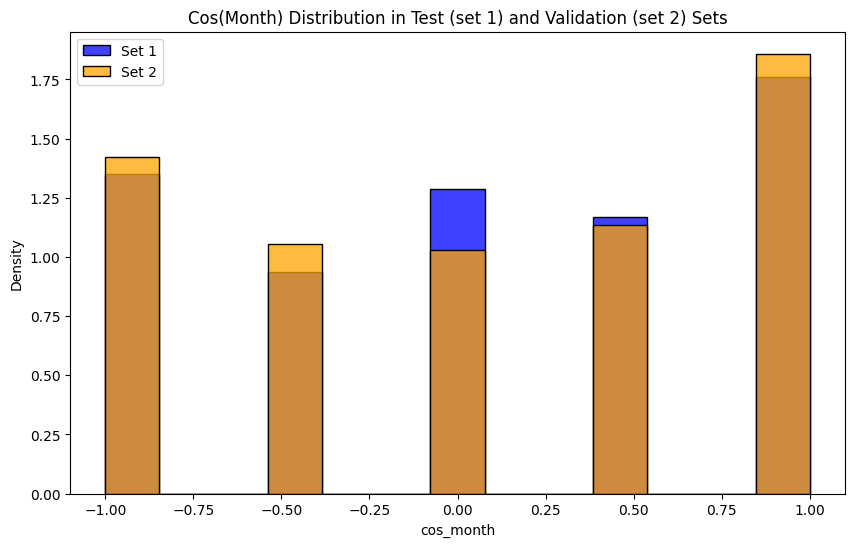

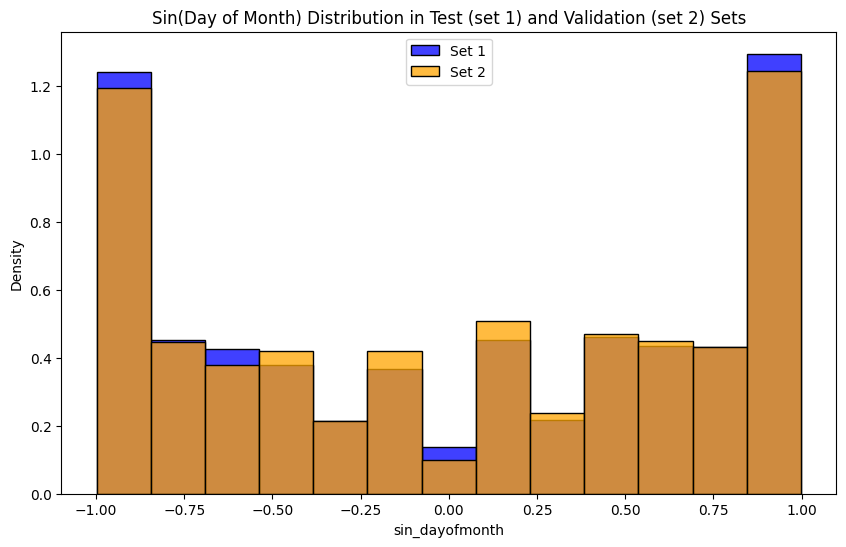

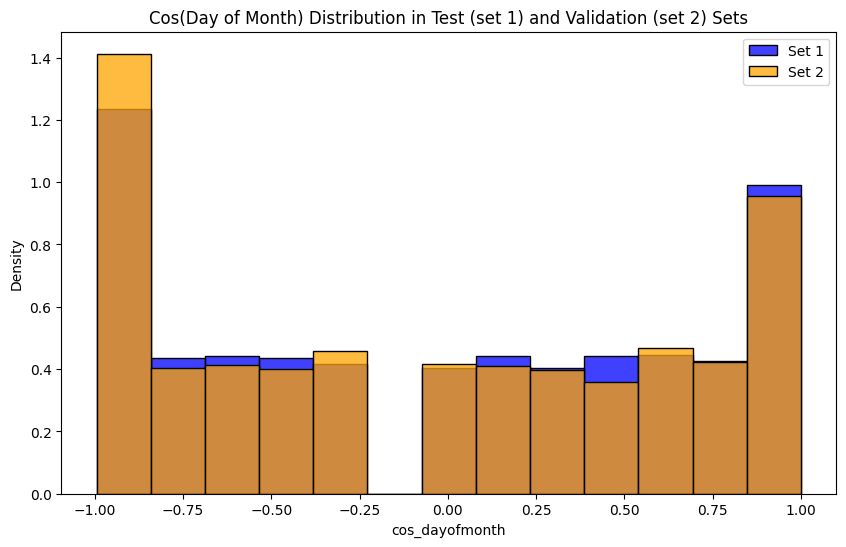

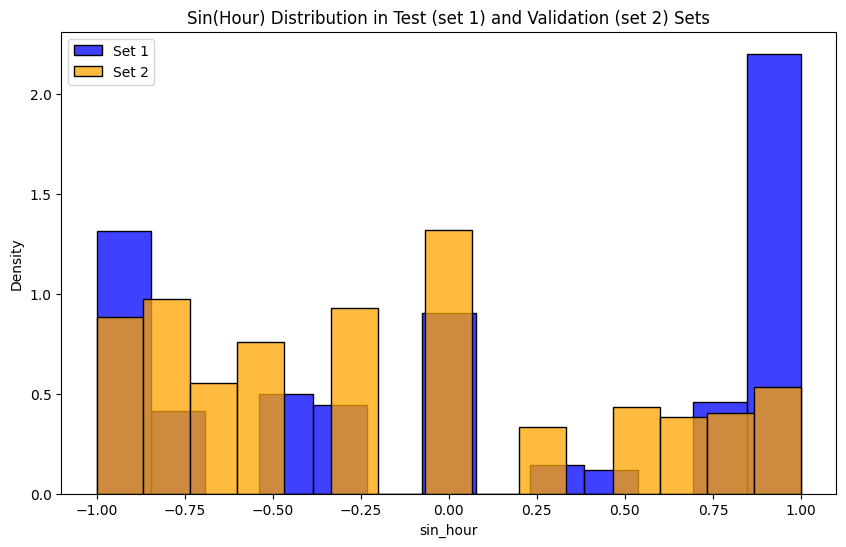

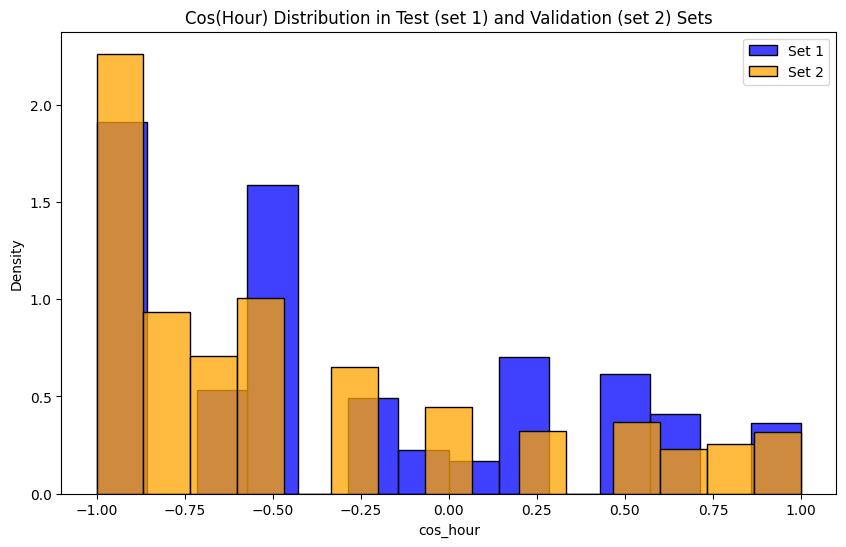

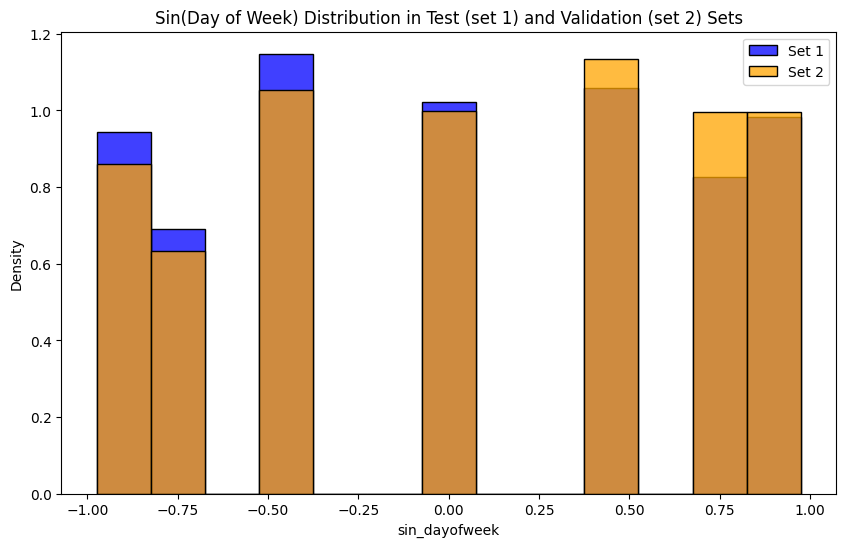

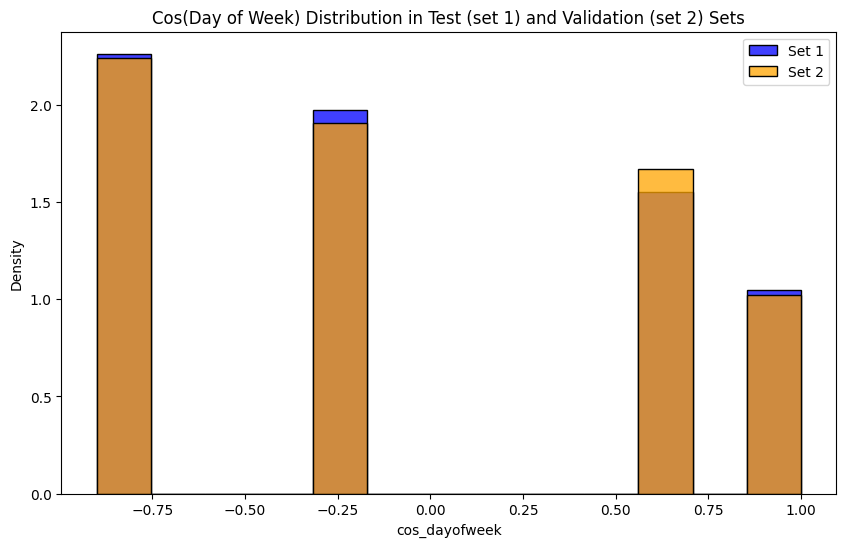

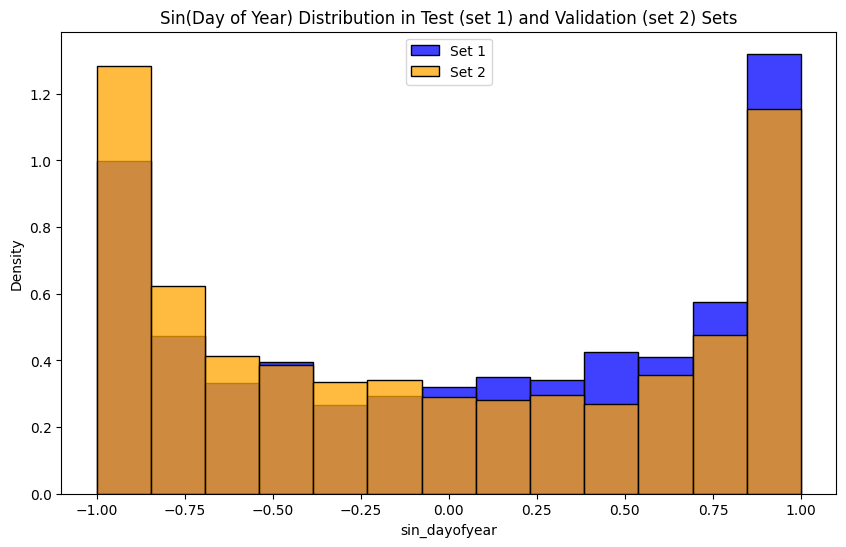

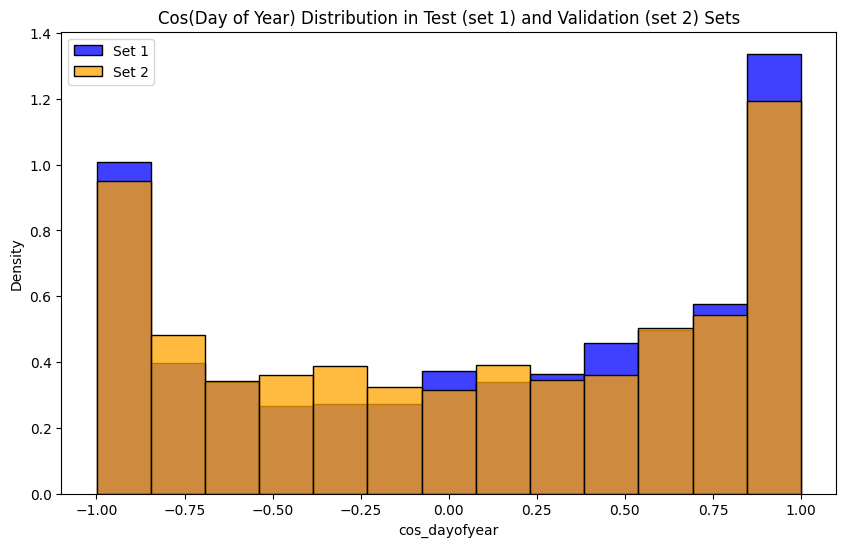

In [51]:
# Check that the distribution of the other features are not too different

# Plot distributions for the temporal features
plot_feature_distribution(prep_test, val_df, 'year', 'Year Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'sin_month', 'Sin(Month) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'cos_month', 'Cos(Month) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'sin_dayofmonth', 'Sin(Day of Month) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'cos_dayofmonth', 'Cos(Day of Month) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'sin_hour', 'Sin(Hour) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'cos_hour', 'Cos(Hour) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'sin_dayofweek', 'Sin(Day of Week) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'cos_dayofweek', 'Cos(Day of Week) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'sin_dayofyear', 'Sin(Day of Year) Distribution in Test (set 1) and Validation (set 2) Sets')
plot_feature_distribution(prep_test, val_df, 'cos_dayofyear', 'Cos(Day of Year) Distribution in Test (set 1) and Validation (set 2) Sets')

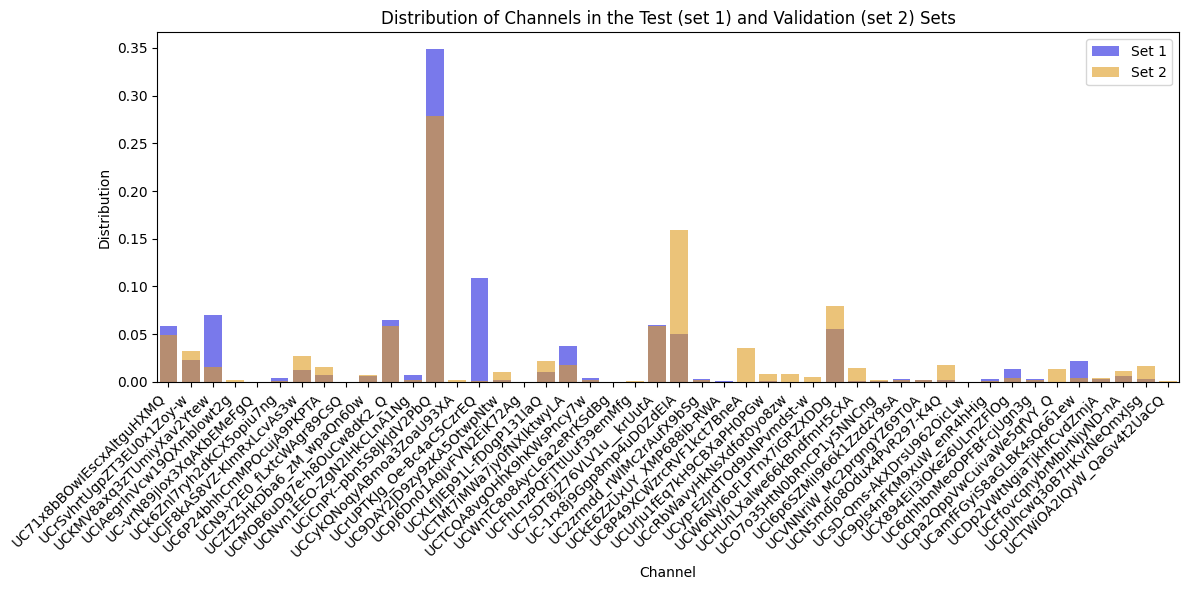

Important Channel UC6P24bhhCmMPOcujA9PKPTA - ratio between the frequencies in the two sets: 2.068416
Important Channel UCrSvhrtUgpZT3EU0x1Zoy-w - ratio between the frequencies in the two sets: 1.4138181818181819
Important Channel UCTMt7iMWa7jy0fNXIktwyLA - ratio between the frequencies in the two sets: 0.48217322834645665
Important Channel UCMOB6uDg7e-h8OuCw8dK2_Q - ratio between the frequencies in the two sets: 0.8949405405405406
Important Channel UCiCnPY--pbn5S8JkJdV2PbQ - ratio between the frequencies in the two sets: 0.7979080033698399
Important Channel UC-1rx8j9Ggp8mp4uD0ZdEIA - ratio between the frequencies in the two sets: 3.167242105263158
Important Channel UC7sDT8jZ76VLV1u__krUutA - ratio between the frequencies in the two sets: 0.9787034482758621


In [52]:
# Plot the distribution of the channels in the validation set and the test set
    
_, _ = plot_channel_distribution(prep_test, val_df, 'Distribution of Channels in the Test (set 1) and Validation (set 2) Sets', important_channels=best_channels)

Some remain a bit over-represented but we cannot really do better.

### **Creation of a custom test set**

In [53]:
custom_test_df, remaining_train_df = create_stratified_set_with_target_channels(train_df, n_videos=800, n_bins=20, important_channels=best_channels, target_frequencies=None, year_threshold=None, target_mean=target_mean, fixed_std=2.2)

Target distribution - Mean: 9.2455, Std: 2.2000

Target channel proportions:
UC6P24bhhCmMPOcujA9PKPTA: 0.0827
UCrSvhrtUgpZT3EU0x1Zoy-w: 0.0877
UCTMt7iMWa7jy0fNXIktwyLA: 0.0353
UCMOB6uDg7e-h8OuCw8dK2_Q: 0.0481
UCiCnPY--pbn5S8JkJdV2PbQ: 0.1172
UC-1rx8j9Ggp8mp4uD0ZdEIA: 0.3595
UC7sDT8jZ76VLV1u__krUutA: 0.0590
Bin 0: Target 40 videos, Available 78 videos
Bin 1: Target 40 videos, Available 149 videos
Bin 2: Target 40 videos, Available 129 videos
Bin 3: Target 40 videos, Available 134 videos
Bin 4: Target 40 videos, Available 170 videos
Bin 5: Target 40 videos, Available 277 videos
Bin 6: Target 40 videos, Available 290 videos
Bin 7: Target 40 videos, Available 455 videos
Bin 8: Target 40 videos, Available 667 videos
Bin 9: Target 40 videos, Available 861 videos
Bin 10: Target 40 videos, Available 885 videos
Bin 11: Target 40 videos, Available 806 videos
Bin 12: Target 40 videos, Available 680 videos
Bin 13: Target 40 videos, Available 696 videos
Bin 14: Target 40 videos, Available 751 video

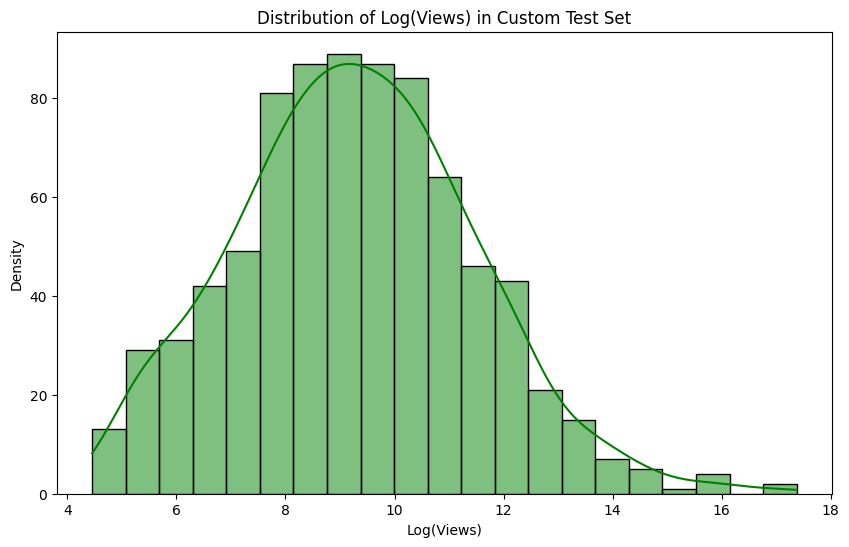

Is the custom test set disjoint from the training set ? True
Number of videos remaining in the training set: 12182


In [54]:
# Check the distribution of the logviews in the custom test set
plt.figure(figsize=(10, 6))
sns.histplot(custom_test_df['logviews'], bins='auto', kde=True, color='green')
plt.title('Distribution of Log(Views) in Custom Test Set')
plt.xlabel('Log(Views)')
plt.ylabel('Density')
plt.show()

# Check that the custom test set is disjoint from the training set
train_ids = set(remaining_train_df['id'])
test_ids = set(custom_test_df['id'])
disjoint_test = train_ids.isdisjoint(test_ids)
print(f"Is the custom test set disjoint from the training set ? {disjoint_test}")
print(f"Number of videos remaining in the training set: {len(remaining_train_df)}")

## **Data augmentation on the remaining train set**

As we have seen, the distribution in logviews is a gaussian, so outliers are rare. We are going to increase their number by augmenting the thumbnails and the year of publication.

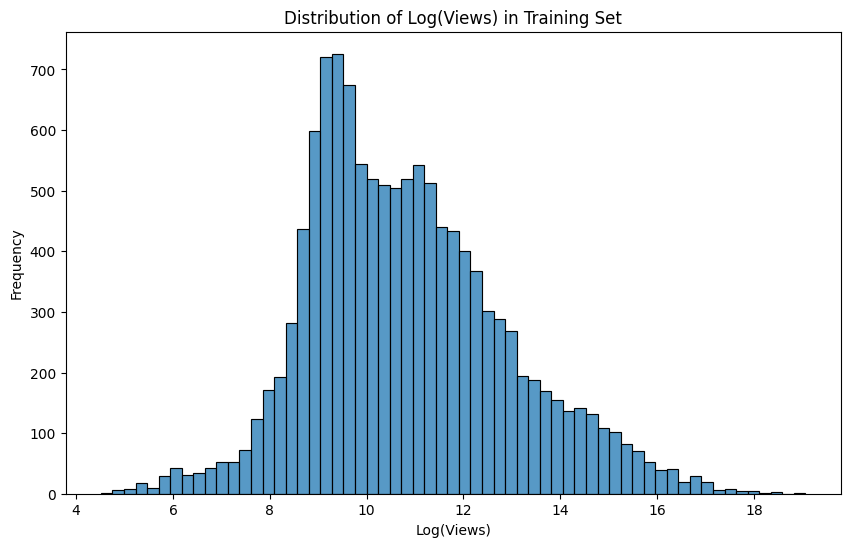

Number of videos remaining in training set: 12182
Mean : 10.825584971179076
Standard deviation : 2.075748914253007
Number of videos outside of [mu - sigma, mu + sigma] : 3421
Number of videos inside of [mu - sigma, mu + sigma] : 8761


In [55]:
# First let's study the distribution of logviews in the training set

plt.figure(figsize=(10, 6))
sns.histplot(remaining_train_df['logviews'], bins='auto', kde=False)
plt.title('Distribution of Log(Views) in Training Set')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.show()

print(f"Number of videos remaining in training set: {len(remaining_train_df)}")
print(f"Mean : {remaining_train_df['logviews'].mean()}")
print(f"Standard deviation : {remaining_train_df['logviews'].std()}")
print(f"Number of videos outside of [mu - sigma, mu + sigma] : {len(remaining_train_df[(remaining_train_df['logviews'] < remaining_train_df['logviews'].mean() - remaining_train_df['logviews'].std()) | (remaining_train_df['logviews'] > remaining_train_df['logviews'].mean() + remaining_train_df['logviews'].std())])}")
print(f"Number of videos inside of [mu - sigma, mu + sigma] : {len(remaining_train_df[(remaining_train_df['logviews'] >= remaining_train_df['logviews'].mean() - remaining_train_df['logviews'].std()) & (remaining_train_df['logviews'] <= remaining_train_df['logviews'].mean() + remaining_train_df['logviews'].std())])}")

In [56]:
# Let's separate the center of the distribution from the tail
train_df_center = remaining_train_df[(remaining_train_df['logviews'] >= remaining_train_df['logviews'].mean() - remaining_train_df['logviews'].std()) & (remaining_train_df['logviews'] <= remaining_train_df['logviews'].mean() + remaining_train_df['logviews'].std())]
train_df_tail = remaining_train_df[(remaining_train_df['logviews'] < remaining_train_df['logviews'].mean() - remaining_train_df['logviews'].std()) | (remaining_train_df['logviews'] > remaining_train_df['logviews'].mean() + remaining_train_df['logviews'].std())]

### **Image augmentation**

In [57]:
transform = transforms.Compose([
transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
transforms.RandomHorizontalFlip(p=0.5),
transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
transforms.RandomRotation(degrees=5)])

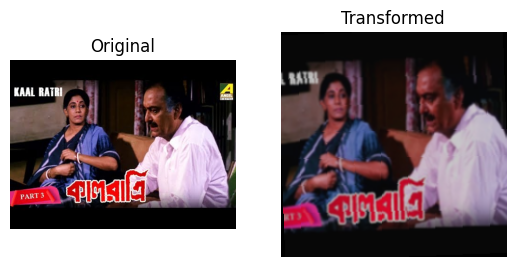

In [58]:
# Test the transform on a sample image

# Load a sample image
path = '../dataset/train_val/__fOu1HUZK0.jpg'
image = Image.open(path)
image = image.convert('RGB')  # Ensure the image is in RGB format

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

# Apply the transformation
transformed_image = transform(image)

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title("Transformed")
plt.axis('off')

plt.show()

### **Year augmentation**

In [59]:
def change_year(year):
    changed_year = year + 0.1*np.random.randn()
    if changed_year > 1:
        changed_year = 1
    elif changed_year < 0:
        changed_year = 0
    return changed_year

In [60]:
change_year(0.5)

0.4781408367210399

### **Augmentation**

In [61]:
# We augment the videos that are in the tail of the distribution

new_train_df_tail = train_df_tail.copy()

for i in range(len(train_df_tail)):
    for k in range(2):
        # Get the path of the video
        path = '../dataset/train_val/' + train_df_tail['id'].iloc[i] + '.jpg'
        # Load the image
        image = Image.open(path)
        image = image.convert('RGB')  # Ensure the image is in RGB format
        # Apply the transformation
        transformed_image = transform(image)
        new_id = train_df_tail['id'].iloc[i] + '_augmented' + str(k)
        # Save the image
        transformed_image.save('../dataset/train_val/' + new_id + '.jpg')
        # Change the year
        new_year = change_year(train_df_tail['year'].iloc[i])
        # Create a new row in the dataframe
        new_row = train_df_tail.iloc[i].copy()
        new_row['id'] = new_id
        new_row['year'] = new_year

        # Add the new row to the dataframe
        new_train_df_tail = pd.concat([new_train_df_tail, new_row.to_frame().T], ignore_index=True)

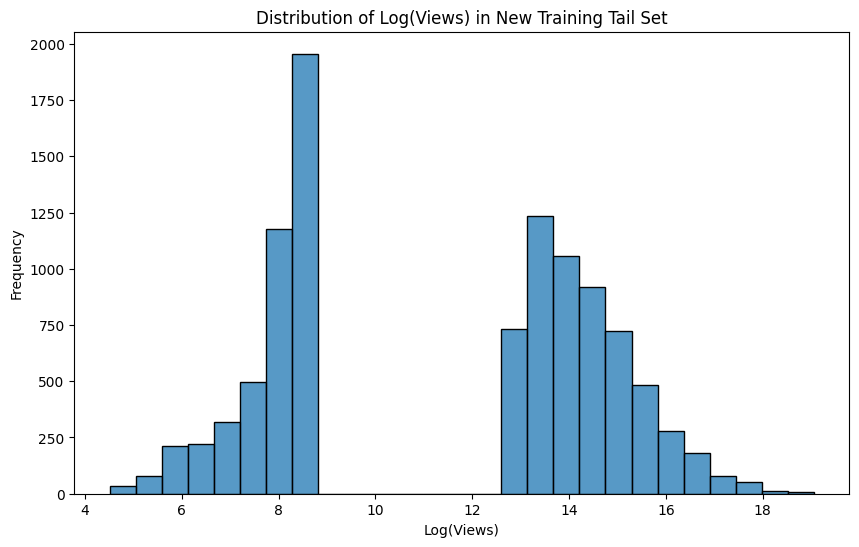

In [62]:
# plot the distribution of the logviews in the new training set

plt.figure(figsize=(10, 6))
sns.histplot(new_train_df_tail['logviews'], bins='auto', kde=False)
plt.title('Distribution of Log(Views) in New Training Tail Set')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Re-assemble the training set

new_train_df = pd.concat([train_df_center, new_train_df_tail], ignore_index=True)

print(f"Number of videos in the new training set: {len(new_train_df)}")

Number of videos in the new training set: 19024


In [64]:
# Let's now create the final training test to be balanced.

final_train_df = create_stratified_set_with_target_channels(new_train_df, n_videos=8000, n_bins=50, important_channels=best_channels, target_mean=target_mean)[0]

Target distribution - Mean: 9.2455, Std: 2.2000

Target channel proportions:
UC6P24bhhCmMPOcujA9PKPTA: 0.0630
UCrSvhrtUgpZT3EU0x1Zoy-w: 0.0946
UCTMt7iMWa7jy0fNXIktwyLA: 0.0438
UCMOB6uDg7e-h8OuCw8dK2_Q: 0.0467
UCiCnPY--pbn5S8JkJdV2PbQ: 0.1310
UC-1rx8j9Ggp8mp4uD0ZdEIA: 0.3108
UC7sDT8jZ76VLV1u__krUutA: 0.0528
Bin 0: Target 160 videos, Available 6 videos
Bin 1: Target 160 videos, Available 72 videos
Bin 2: Target 160 videos, Available 96 videos
Bin 3: Target 160 videos, Available 168 videos
Bin 4: Target 160 videos, Available 99 videos
Bin 5: Target 160 videos, Available 102 videos
Bin 6: Target 160 videos, Available 114 videos
Bin 7: Target 160 videos, Available 120 videos
Bin 8: Target 160 videos, Available 108 videos
Bin 9: Target 160 videos, Available 105 videos
Bin 10: Target 160 videos, Available 144 videos
Bin 11: Target 160 videos, Available 135 videos
Bin 12: Target 160 videos, Available 249 videos
Bin 13: Target 160 videos, Available 270 videos
Bin 14: Target 160 videos, Availabl

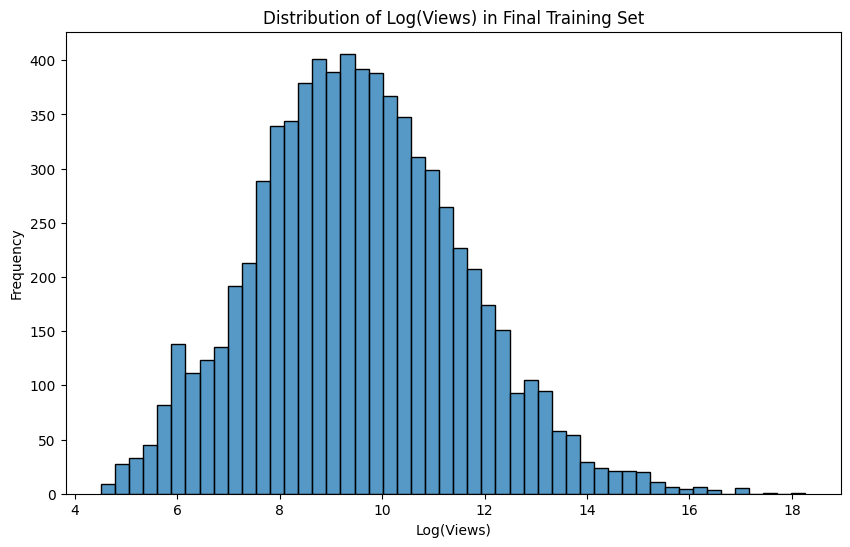

Is the final training set disjoint from the validation set ? True
Is the final training set disjoint from the custom test set ? True
Mean of logviews in final training set: 9.56036480390748
Standard deviation of logviews in final training set: 2.01066280360886
Number of videos in the final training set: 7341


In [65]:
# Check the distribution of the logviews in the final training set

plt.figure(figsize=(10, 6))
sns.histplot(final_train_df['logviews'], bins='auto', kde=False)
plt.title('Distribution of Log(Views) in Final Training Set')
plt.xlabel('Log(Views)')
plt.ylabel('Frequency')
plt.show()

# Check that the final training set is disjoint from the validation set
train_ids = set(final_train_df['id'])
val_ids = set(val_df['id'])
disjoint_final = train_ids.isdisjoint(val_ids)
print(f"Is the final training set disjoint from the validation set ? {disjoint_final}")

# Check that the final training set is disjoint from the custom test set
test_ids = set(custom_test_df['id'])
disjoint_final_test = train_ids.isdisjoint(test_ids)
print(f"Is the final training set disjoint from the custom test set ? {disjoint_final_test}")

# Checking the mean and standard deviation of the logviews in the final training set
print(f"Mean of logviews in final training set: {final_train_df['logviews'].mean()}")
print(f"Standard deviation of logviews in final training set: {final_train_df['logviews'].std()}")
print(f"Number of videos in the final training set: {len(final_train_df)}")

In [66]:
# We add bins to the datasets (because we are going to add a classification head to the model as well)

bin_edges = [-np.inf, 8, 9, 10, 11, 12, 14, np.inf]  # Define bin edges for logviews

def assign_bin(logviews, bin_edges):
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] < logviews <= bin_edges[i + 1]:
            return i

In [67]:
final_train_df['logviews_bin'] = final_train_df['logviews'].apply(lambda x: assign_bin(x, bin_edges))
val_df['logviews_bin'] = val_df['logviews'].apply(lambda x: assign_bin(x, bin_edges))
custom_test_df['logviews_bin'] = custom_test_df['logviews'].apply(lambda x: assign_bin(x, bin_edges))
final_train_df['logviews_bin'].value_counts().sort_index()
class_weights = final_train_df['logviews_bin'].value_counts(normalize=True).to_dict()
class_weights

{0: 0.22299414248739954,
 2: 0.1961585615038823,
 1: 0.1826726604004904,
 3: 0.16646233483176678,
 4: 0.1166053671161967,
 5: 0.09630840484947555,
 6: 0.01879852881078872}

In [68]:
# Get the mean logviews for each bin in the final training set
mean_logviews_per_bin = final_train_df.groupby('logviews_bin')['logviews'].mean().sort_index()
mean_logviews_per_bin

logviews_bin
0      6.95996
1     8.515663
2     9.494943
3    10.480119
4    11.459955
5    12.748585
6     14.98033
Name: logviews, dtype: object

## **Save the datasets**

In [70]:
final_train_df.to_csv('../dataset/final_train_set.csv',
          sep=';',
          encoding='utf-8-sig',
          index=False)
val_df.to_csv('../dataset/validation_set.csv',
          sep=';',
          encoding='utf-8-sig',
          index=False)
prep_test.to_csv('../dataset/test_set.csv',
            sep=';',
            encoding='utf-8-sig',
            index=False)
custom_test_df.to_csv('../dataset/equilibrated_custom_test_set.csv',
            sep=';',
            encoding='utf-8-sig',
            index=False)